# Аналитика образовательной эффективности курса

Этот notebook позволяет анализировать ведомости оценок курса и рассчитывать метрики:
- **Метрика** Завершенность и активность
- **Метрика** Успеваемость
- **Метрика** Качество обучения
- **Метрика** Сравнительные метрики


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from course_analytics import CourseAnalytics
from metric_insights import MetricInsights

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [2]:
COURSE_CONFIG = {
    "excel_path": "Разработка на Python. Профессиональный_1.xlsx",
}

analytics = CourseAnalytics(config=COURSE_CONFIG)
insights = MetricInsights(analytics)

summary = analytics.get_summary()
print("СВОДНАЯ ИНФОРМАЦИЯ О КУРСЕ")
print("=" * 50)
for key, value in summary.items():
    print(f"{key}: {value}")

СВОДНАЯ ИНФОРМАЦИЯ О КУРСЕ
Количество студентов: 128
Количество работ: 14
Работ до учета: None


In [3]:
sources_df = analytics.describe_sources()
if not sources_df.empty:
    display(sources_df)
else:
    print("Нет данных об активностях. Проверьте конфигурацию курса.")

,Активность,Тип,Количество столбцов,Агрегация,Источники
0,⌨️ Git и GitLab,bonus,1,single,⌨️ Git и GitLab
1,⌨️ Протокол HTTP и основы работы с API,bonus,1,single,⌨️ Протокол HTTP и основы работы с API
2,🏆 Проект. Часть 1,project,1,single,🏆 Проект. Часть 1
3,⌨️ FastAPI: организация проекта и работа с HTM...,bonus,1,single,⌨️ FastAPI: организация проекта и работа с HTM...
4,⌨️ Асинхронное программирование в Python,bonus,1,single,⌨️ Асинхронное программирование в Python
5,⌨️ MongoDB и FastAPI,bonus,1,single,⌨️ MongoDB и FastAPI
6,🏆 Проект. Часть 2,project,1,single,🏆 Проект. Часть 2
7,⌨️ Взаимодействие с внешними API через httpx,bonus,1,single,⌨️ Взаимодействие с внешними API через httpx
8,Коллоквиум 1,colloquium,1,single,Коллоквиум 1
9,🏆 Проект. Часть 3,project,1,single,🏆 Проект. Часть 3


## МЕТРИКА 1: Завершенность и активность

### Процент завершения по каждому типу заданий


ПРОЦЕНТ ЗАВЕРШЕНИЯ ПО ТИПАМ ЗАДАНИЙ
           Работа  Выполнили  Всего  Процент Тип работы
🏆 Проект. Часть 1        111    128 86.71875    project
     Коллоквиум 1        109    128 85.15625 colloquium
🏆 Проект. Часть 2        107    128 83.59375    project
🏆 Проект. Часть 3         97    128 75.78125    project
🏆 Проект. Часть 4         97    128 75.78125    project


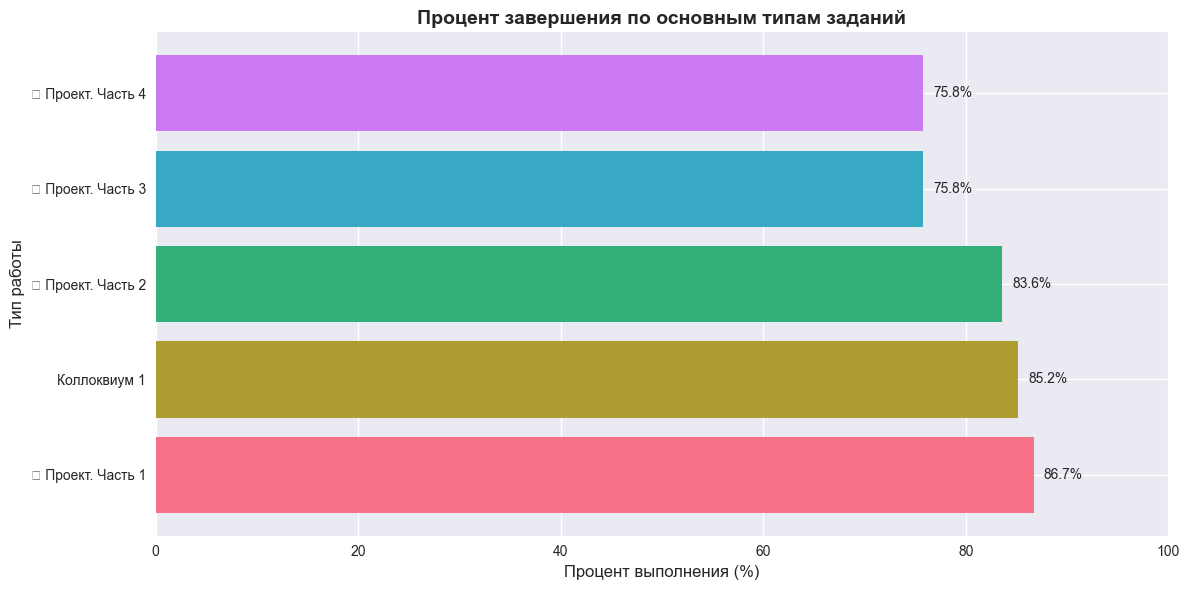


ПРОЦЕНТ ЗАВЕРШЕНИЯ ПО КАЖДОМУ ОТДЕЛЬНОМУ ЗАДАНИЮ
                                                   Работа  Выполнили  Всего  Процент Тип работы
                                        🏆 Проект. Часть 1        111    128 86.71875    project
                                        🏆 Проект. Часть 2        107    128 83.59375    project
                                        🏆 Проект. Часть 3         97    128 75.78125    project
                                        🏆 Проект. Часть 4         97    128 75.78125    project
                                             Коллоквиум 1        109    128 85.15625 colloquium
                                          ⌨️ Git и GitLab         31    128 24.21875      bonus
                   ⌨️ Протокол HTTP и основы работы с API         24    128 18.75000      bonus
⌨️ FastAPI: организация проекта и работа с HTML-шаблонами         20    128 15.62500      bonus
                 ⌨️ Асинхронное программирование в Python         25    128 19.53125  

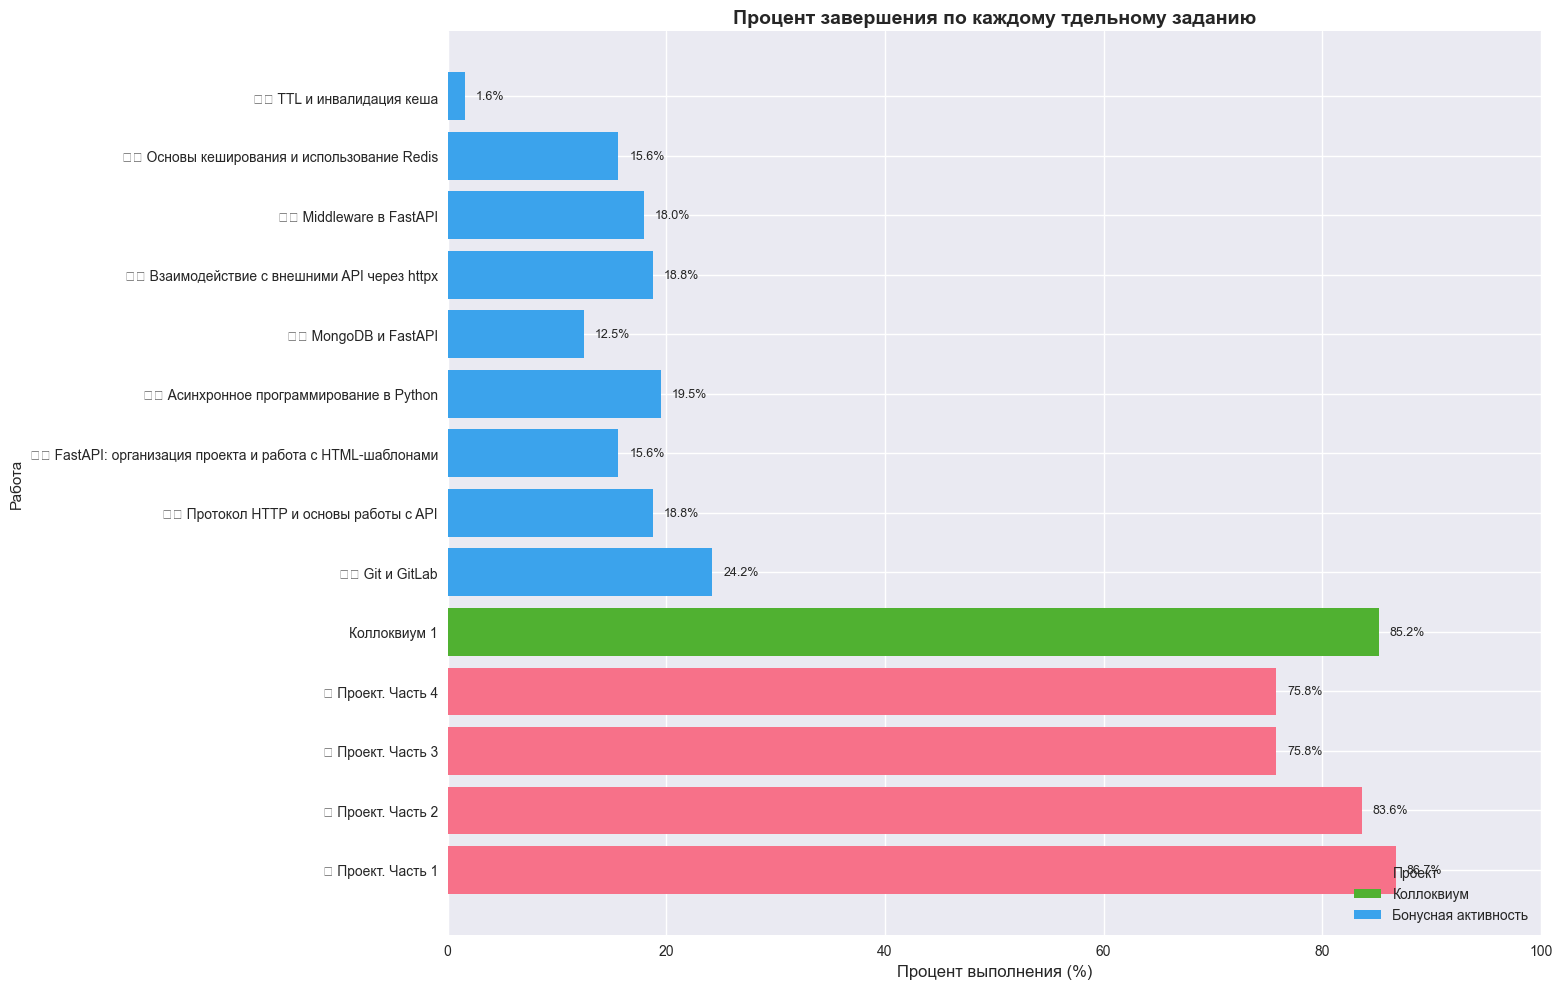


💡 ПОДСКАЗКИ ПО ЗАВЕРШЕННОСТИ

✅ 🏆 Проект. Часть 1 (86.7%)
   ✅ Активность '🏆 Проект. Часть 1' показывает хорошую завершенность (86.7%), но есть потенциал для улучшения. Рекомендуется проанализировать причины, почему 17 студентов не выполнили работу, и применить успешные практики этой активности к другим работам.

✅ Коллоквиум 1 (85.2%)
   ✅ Активность 'Коллоквиум 1' показывает хорошую завершенность (85.2%), но есть потенциал для улучшения. Рекомендуется проанализировать причины, почему 19 студентов не выполнили работу, и применить успешные практики этой активности к другим работам.

✅ 🏆 Проект. Часть 2 (83.6%)
   ✅ Активность '🏆 Проект. Часть 2' показывает хорошую завершенность (83.6%), но есть потенциал для улучшения. Рекомендуется проанализировать причины, почему 21 студентов не выполнили работу, и применить успешные практики этой активности к другим работам.

✅ 🏆 Проект. Часть 3 (75.8%)
   ✅ Активность '🏆 Проект. Часть 3' показывает хорошую завершенность (75.8%), но есть потенциал 

In [4]:
completion_df = analytics.get_completion_rates()

print("ПРОЦЕНТ ЗАВЕРШЕНИЯ ПО ТИПАМ ЗАДАНИЙ")
print("=" * 60)
print(completion_df.to_string(index=False))

# Визуализация 1: По типам заданий
fig, ax = plt.subplots(figsize=(12, 6))
colors = sns.color_palette("husl", len(completion_df))
bars = ax.barh(completion_df['Работа'], completion_df['Процент'], color=colors)
ax.set_xlabel('Процент выполнения (%)', fontsize=12)
ax.set_ylabel('Тип работы', fontsize=12)
ax.set_title('Процент завершения по основным типам заданий', fontsize=14, fontweight='bold')
ax.set_xlim(0, 100)

for i, (bar, pct) in enumerate(zip(bars, completion_df['Процент'])):
    ax.text(pct + 1, i, f'{pct:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Каждое задание (включая бонусные)
completion_individual_df = analytics.get_completion_rates_by_individual_works()

print("\n" + "=" * 60)
print("ПРОЦЕНТ ЗАВЕРШЕНИЯ ПО КАЖДОМУ ОТДЕЛЬНОМУ ЗАДАНИЮ")
print("=" * 60)
print(completion_individual_df.to_string(index=False))

# Визуализация 2: По каждой отдельной работе
fig, ax = plt.subplots(figsize=(16, max(10, len(completion_individual_df) * 0.4)))

# Цвета по типам работ
available_types = completion_individual_df['Тип работы'].unique().tolist()
ordered_types = [t for t in getattr(analytics, 'type_order', []) if t in available_types]
for t in available_types:
    if t not in ordered_types:
        ordered_types.append(t)

palette = sns.color_palette("husl", len(ordered_types))
color_map = {t: palette[idx] for idx, t in enumerate(ordered_types)}
label_map = {
    t: analytics.activity_classifier.get(t, {}).get('label', t.capitalize())
    for t in ordered_types
}

colors = [color_map.get(work_type, '#6C757D')
          for work_type in completion_individual_df['Тип работы']]

bars = ax.barh(completion_individual_df['Работа'], completion_individual_df['Процент'], color=colors)
ax.set_xlabel('Процент выполнения (%)', fontsize=12)
ax.set_ylabel('Работа', fontsize=11)
ax.set_title('Процент завершения по каждому тдельному заданию',
             fontsize=14, fontweight='bold')
ax.set_xlim(0, 100)

for i, (bar, pct) in enumerate(zip(bars, completion_individual_df['Процент'])):
    ax.text(pct + 1, i, f'{pct:.1f}%', va='center', fontsize=9)

# Легенда
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_map[t], label=label_map.get(t, t.capitalize()))
    for t in ordered_types
    if t in completion_individual_df['Тип работы'].values
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.show()

# Подсказки по завершенности
print("\n" + "=" * 80)
print("💡 ПОДСКАЗКИ ПО ЗАВЕРШЕННОСТИ")
print("=" * 80)
completion_insights = insights.get_completion_insights()
if completion_insights:
    for i, insight in enumerate(completion_insights, 1):
        icon = "🚨" if insight['type'] == 'warning' else "ℹ️" if insight['type'] == 'info' else "✅"
        print(f"\n{icon} {insight['activity']} ({insight['value']})")
        print(f"   {insight['recommendation']}")
else:
    print("Нет критических замечаний по завершенности.")


### Траектория вовлеченности студентов (по реперным точкам)


ТРАЕКТОРИЯ ВОВЛЕЧЕННОСТИ ПО ОСНОВНЫМ ЗАДАНИЯМ
           Работа  Процент  Выполнили  Всего  Порядок
🏆 Проект. Часть 1 86.71875        111    128        1
🏆 Проект. Часть 2 83.59375        107    128        2
🏆 Проект. Часть 3 75.78125         97    128        3
🏆 Проект. Часть 4 75.78125         97    128        4
     Коллоквиум 1 85.15625        109    128        5


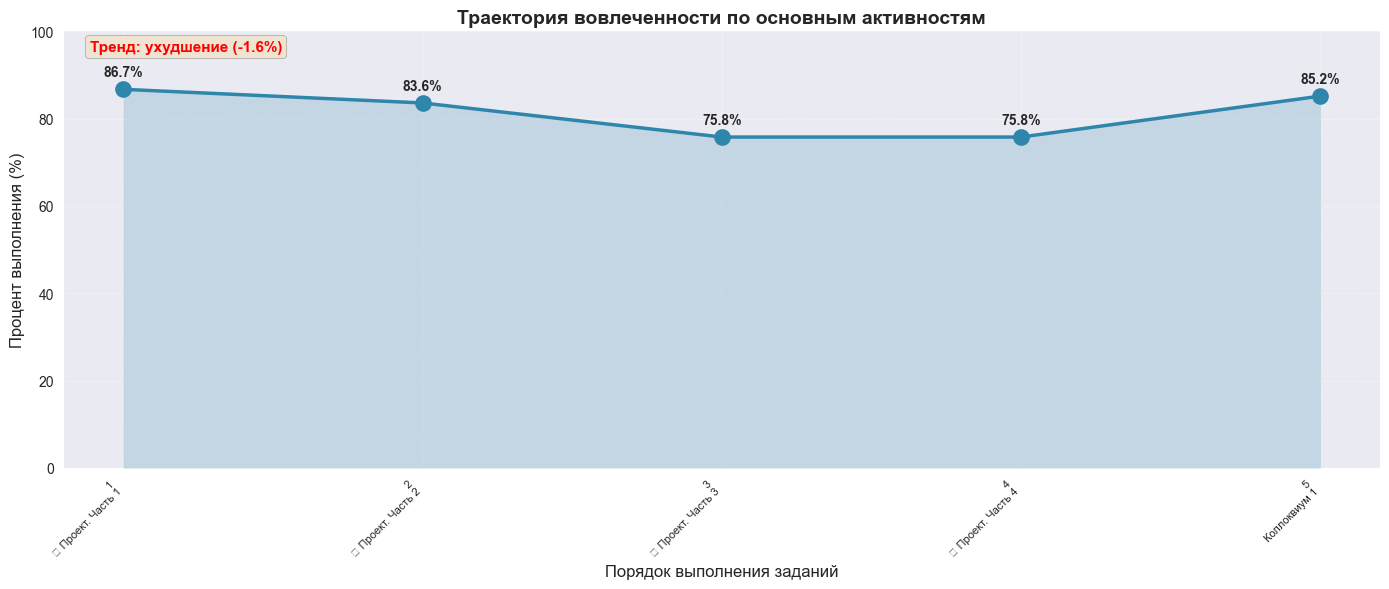


ТОЧКА ОТСЕВА: 🏆 Проект. Часть 3
   Падение вовлеченности: 7.8%
   До: 85.2% → После: 75.8%

📊 ТРАЕКТОРИЯ ВОВЛЕЧЕННОСТИ ПО БОНУСНЫМ АКТИВНОСТЯМ
                                                   Работа  Процент  Выполнили  Всего  Порядок
                                          ⌨️ Git и GitLab 24.21875         31    128        1
                   ⌨️ Протокол HTTP и основы работы с API 18.75000         24    128        2
⌨️ FastAPI: организация проекта и работа с HTML-шаблонами 15.62500         20    128        3
                 ⌨️ Асинхронное программирование в Python 19.53125         25    128        4
                                     ⌨️ MongoDB и FastAPI 12.50000         16    128        5
             ⌨️ Взаимодействие с внешними API через httpx 18.75000         24    128        6
                                  ⌨️ Middleware в FastAPI 17.96875         23    128        7
              ⌨️ Основы кеширования и использование Redis 15.62500         20    128        8
          

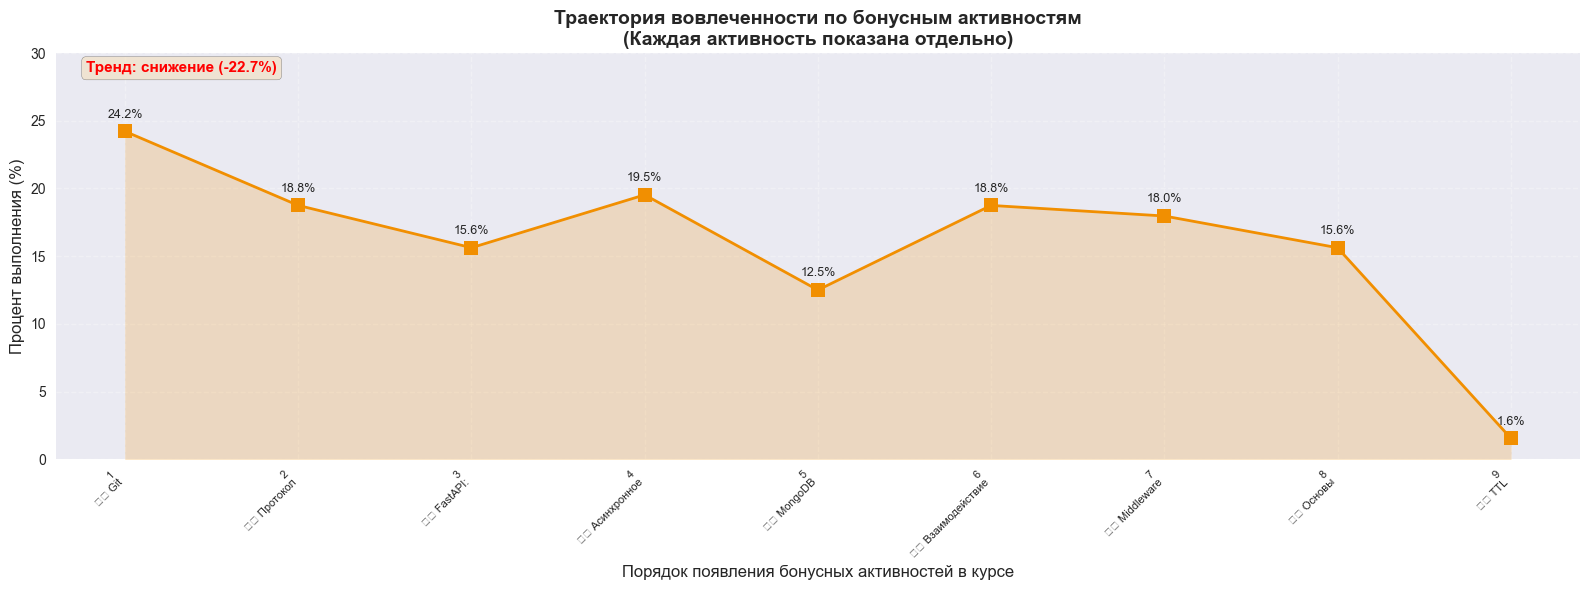


💡 ПОДСКАЗКИ ПО ТРАЕКТОРИИ ВОВЛЕЧЕННОСТИ
Нет критических замечаний по траектории вовлеченности.


In [5]:
trajectory_main_df = analytics.get_engagement_trajectory()

if len(trajectory_main_df) > 0:
    print("ТРАЕКТОРИЯ ВОВЛЕЧЕННОСТИ ПО ОСНОВНЫМ ЗАДАНИЯМ")
    print("=" * 60)
    print(trajectory_main_df.to_string(index=False))
    
    # Визуализация 1: По основным заданиям
    # Увеличиваем размер фигуры в зависимости от количества активностей
    num_activities = len(trajectory_main_df)
    fig_width = max(14, num_activities * 0.8)
    fig, ax = plt.subplots(figsize=(fig_width, 6))
    
    ax.plot(trajectory_main_df['Порядок'], trajectory_main_df['Процент'], 
            marker='o', linewidth=2.5, markersize=12, color='#2E86AB', label='Вовлеченность')
    ax.fill_between(trajectory_main_df['Порядок'], trajectory_main_df['Процент'], alpha=0.2, color='#2E86AB')

    ax.set_xticks(trajectory_main_df['Порядок'])
    # Создаем более компактные подписи
    labels = []
    for i, (_, row) in enumerate(trajectory_main_df.iterrows(), 1):
        work_name = row['Работа']
        # Сокращаем длинные названия
        if len(work_name) > 20:
            # Берем первые слова или обрезаем
            words = work_name.split()
            if len(words) > 2:
                short_name = ' '.join(words[:2]) + '...'
            else:
                short_name = work_name[:17] + '...'
        else:
            short_name = work_name
        labels.append(f"{i}\n{short_name}")
    
    # Используем поворот 45 градусов для лучшей читаемости
    ax.set_xticklabels(labels, fontsize=8, rotation=45, ha='right')
    
    ax.set_xlabel('Порядок выполнения заданий', fontsize=12)
    ax.set_ylabel('Процент выполнения (%)', fontsize=12)
    ax.set_title('Траектория вовлеченности по основным активностям', 
                 fontsize=14, fontweight='bold')
    ax.set_ylim(0, 100)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Добавляем значения на график
    for idx, row in trajectory_main_df.iterrows():
        ax.text(row['Порядок'], row['Процент'] + 3, 
                f"{row['Процент']:.1f}%", 
                ha='center', fontsize=10, fontweight='bold')

    if len(trajectory_main_df) >= 2:
        first_pct = trajectory_main_df.iloc[0]['Процент']
        last_pct = trajectory_main_df.iloc[-1]['Процент']
        trend = last_pct - first_pct
        trend_text = "улучшение" if trend > 0 else ("ухудшение" if trend < 0 else "стабильно")
        trend_color = "green" if trend > 0 else ("red" if trend < 0 else "gray")
        ax.text(0.02, 0.98, f"Тренд: {trend_text} ({trend:+.1f}%)", 
                transform=ax.transAxes, fontsize=11, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                color=trend_color, fontweight='bold')
    
    # Добавляем дополнительное место внизу для подписей
    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    plt.show()
    
    # Анализ точки отсева
    dropout = analytics.get_dropout_point()
    if dropout.get('point_found'):
        print(f"\nТОЧКА ОТСЕВА: {dropout['work']}")
        print(f"   Падение вовлеченности: {dropout['drop_percentage']:.1f}%")
        if dropout['before']:
            print(f"   До: {dropout['before']:.1f}% → После: {dropout['after']:.1f}%")
else:
    print("Недостаточно данных для анализа траектории по основным работам")

# Получаем траекторию по бонусным активностям
trajectory_bonus_df = analytics.get_bonus_engagement_trajectory()

if len(trajectory_bonus_df) > 0:
    print("\n" + "=" * 60)
    print("📊 ТРАЕКТОРИЯ ВОВЛЕЧЕННОСТИ ПО БОНУСНЫМ АКТИВНОСТЯМ")
    print("=" * 60)
    print(trajectory_bonus_df.to_string(index=False))
    
    # Визуализация 2: По бонусным активностям
    # Увеличиваем размер фигуры в зависимости от количества активностей
    num_bonus = len(trajectory_bonus_df)
    fig_width_bonus = max(16, num_bonus * 0.7)
    fig, ax = plt.subplots(figsize=(fig_width_bonus, 6))
    
    ax.plot(trajectory_bonus_df['Порядок'], trajectory_bonus_df['Процент'], 
            marker='s', linewidth=2, markersize=10, color='#F18F01', label='Вовлеченность')
    ax.fill_between(trajectory_bonus_df['Порядок'], trajectory_bonus_df['Процент'], 
                    alpha=0.2, color='#F18F01')
    
    # Добавляем названия работ (сокращенные)
    ax.set_xticks(trajectory_bonus_df['Порядок'])
    # Берем первые слова из названия для краткости
    short_names = []
    for _, row in trajectory_bonus_df.iterrows():
        name = row['Работа']
        order = row['Порядок']
        # Создаем более компактные подписи
        words = name.split()
        # Для названий типа "Week N. Аудиторная работа" берем только "Week N"
        if 'Week' in name and '.' in name:
            week_part = name.split('.')[0].strip()
            # Если есть номер активности (например, "2"), добавляем его
            if len(words) > 3 and words[-1].isdigit():
                short_name = f"{week_part}\nАуд. {words[-1]}"
            else:
                short_name = f"{week_part}\nАуд."
        else:
            # Для других названий берем первые 2 слова
            if len(words) > 2:
                short_name = ' '.join(words[:2])
            else:
                short_name = name[:15] if len(name) > 15 else name
        short_names.append(f"{order}\n{short_name}")
    
    # Используем поворот 45 градусов для лучшей читаемости
    ax.set_xticklabels(short_names, fontsize=8, rotation=45, ha='right')
    
    ax.set_xlabel('Порядок появления бонусных активностей в курсе', fontsize=12)
    ax.set_ylabel('Процент выполнения (%)', fontsize=12)
    ax.set_title('Траектория вовлеченности по бонусным активностям\n(Каждая активность показана отдельно)', 
                 fontsize=14, fontweight='bold')
    ax.set_ylim(0, max(30, trajectory_bonus_df['Процент'].max() + 5))
    ax.grid(True, alpha=0.3, linestyle='--')

    for idx, row in trajectory_bonus_df.iterrows():
        ax.text(row['Порядок'], row['Процент'] + 1, 
                f"{row['Процент']:.1f}%", 
                ha='center', fontsize=9)

    if len(trajectory_bonus_df) >= 2:
        first_pct = trajectory_bonus_df.iloc[0]['Процент']
        last_pct = trajectory_bonus_df.iloc[-1]['Процент']
        trend = last_pct - first_pct
        trend_text = "рост" if trend > 0 else ("снижение" if trend < 0 else "стабильно")
        trend_color = "green" if trend > 0 else ("red" if trend < 0 else "gray")
        ax.text(0.02, 0.98, f"Тренд: {trend_text} ({trend:+.1f}%)", 
                transform=ax.transAxes, fontsize=11, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                color=trend_color, fontweight='bold')
    
    # Добавляем дополнительное место внизу для подписей
    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    plt.show()

else:
    print("Недостаточно данных для анализа траектории по бонусным активностям")

# Подсказки по траектории вовлеченности
print("\n" + "=" * 80)
print("💡 ПОДСКАЗКИ ПО ТРАЕКТОРИИ ВОВЛЕЧЕННОСТИ")
print("=" * 80)
trajectory_insights = insights.get_engagement_trajectory_insights()
if trajectory_insights:
    for i, insight in enumerate(trajectory_insights, 1):
        icon = "🚨" if insight['type'] == 'warning' else "ℹ️" if insight['type'] == 'info' else "✅"
        print(f"\n{icon} {insight['activity']} ({insight['value']})")
        print(f"   {insight['recommendation']}")
else:
    print("Нет критических замечаний по траектории вовлеченности.")


## МЕТРИКА 2: Успеваемость

### Распределение оценок по типам работ


РАСПРЕДЕЛЕНИЕ ОЦЕНОК ПО ТИПАМ ЗАДАНИЙ
                                                   Работа        Тип  Средний балл  Медиана  Стандартное отклонение  Минимум  Максимум  Количество оценок
                                          ⌨️ Git и GitLab      bonus      8.225806     8.90                2.197942      1.8      10.0                 31
                   ⌨️ Протокол HTTP и основы работы с API      bonus      4.604167     4.60                2.002598      1.5       9.2                 24
                                        🏆 Проект. Часть 1    project      8.016216     9.30                2.181558      2.2       9.9                111
⌨️ FastAPI: организация проекта и работа с HTML-шаблонами      bonus      6.050000     6.40                1.271810      2.6       8.1                 20
                 ⌨️ Асинхронное программирование в Python      bonus      6.212000     6.50                1.080489      4.4       8.9                 25
                                     ⌨

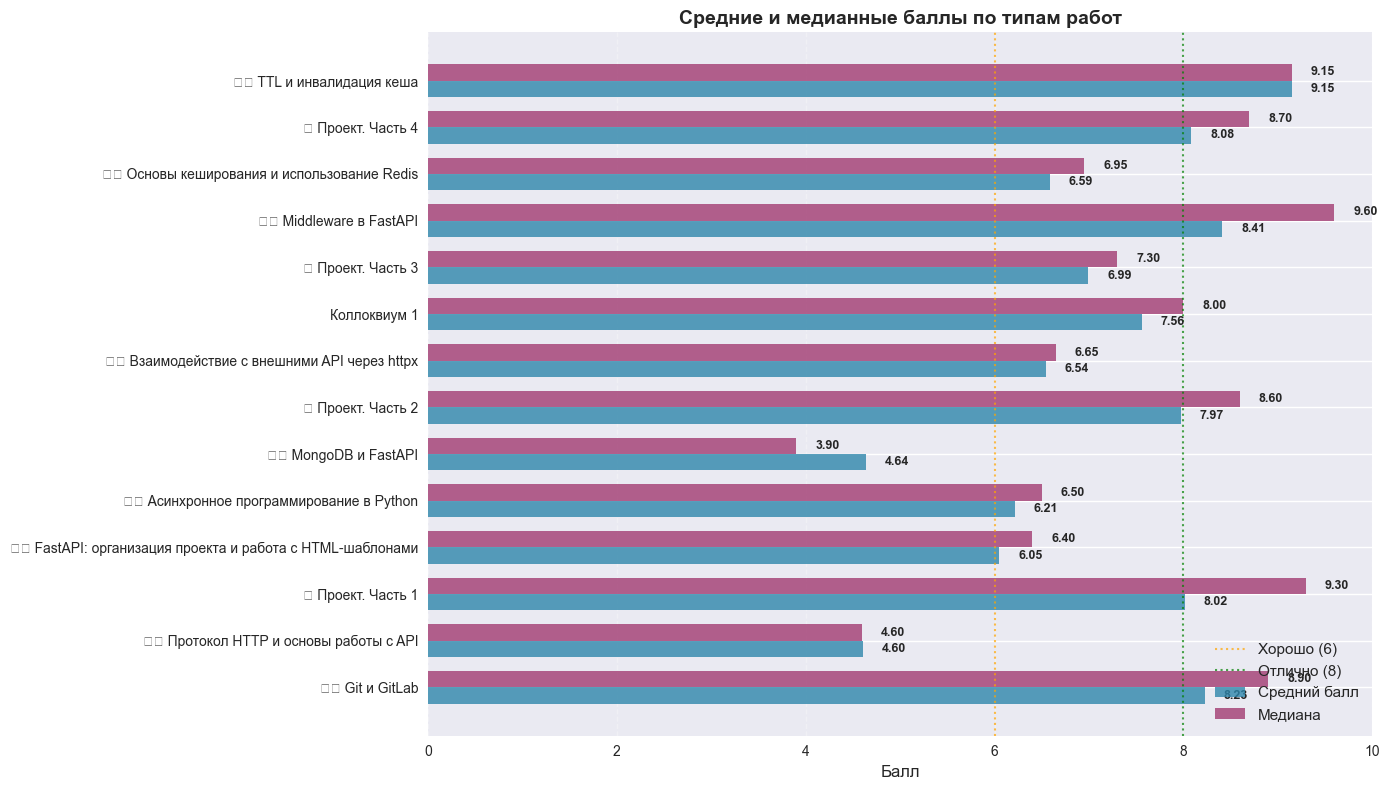

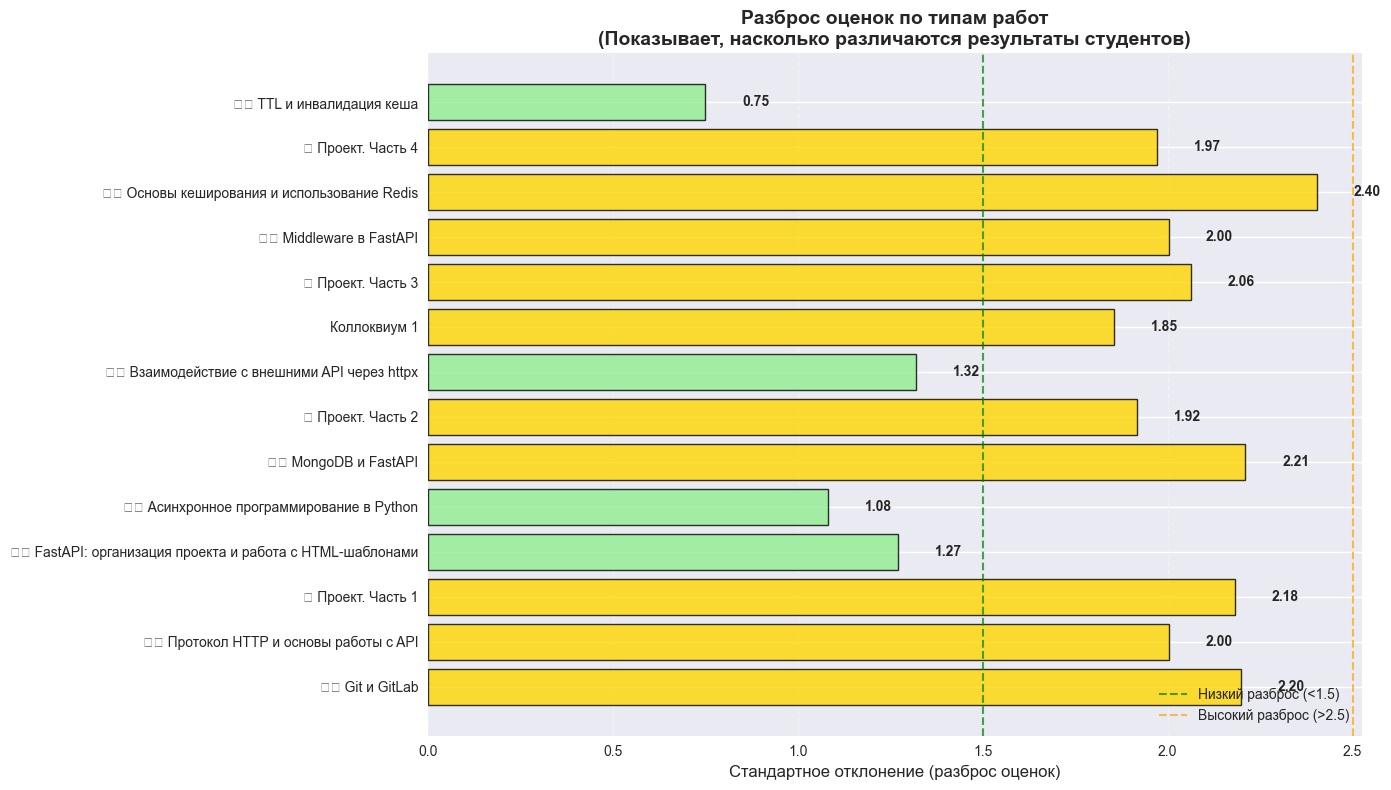


💡 ПОДСКАЗКИ ПО УСПЕВАЕМОСТИ

🚨 ⌨️ Протокол HTTP и основы работы с API (Средний балл: 4.60)
   ⚠️ Активность '⌨️ Протокол HTTP и основы работы с API' показывает низкий средний балл (4.60). Это может указывать на то, что задание слишком сложное или критерии оценки слишком строгие. Рекомендуется: 1) Пересмотреть сложность задания и требования, 2) Проверить критерии оценки на соответствие уровню студентов, 3) Рассмотреть возможность дополнительных консультаций или материалов, 4) Проанализировать типичные ошибки студентов и добавить разборы.

🚨 ⌨️ MongoDB и FastAPI (Средний балл: 4.64)
   ⚠️ Активность '⌨️ MongoDB и FastAPI' показывает низкий средний балл (4.64). Это может указывать на то, что задание слишком сложное или критерии оценки слишком строгие. Рекомендуется: 1) Пересмотреть сложность задания и требования, 2) Проверить критерии оценки на соответствие уровню студентов, 3) Рассмотреть возможность дополнительных консультаций или материалов, 4) Проанализировать типичные ошибки студент

In [6]:
performance_df = analytics.get_performance_distribution()

if len(performance_df) > 0:
    print("РАСПРЕДЕЛЕНИЕ ОЦЕНОК ПО ТИПАМ ЗАДАНИЙ")
    print("=" * 80)
    pd.set_option('display.max_columns', None)
    print(performance_df.to_string(index=False))
    
    # ГРАФИК 1: Средние и медианные баллы
    fig, ax = plt.subplots(figsize=(14, max(8, len(performance_df) * 0.5)))
    
    x = np.arange(len(performance_df))
    width = 0.35
    
    bars1 = ax.barh(x - width/2, performance_df['Средний балл'], width, 
                    label='Средний балл', color='#2E86AB', alpha=0.8)
    bars2 = ax.barh(x + width/2, performance_df['Медиана'], width, 
                    label='Медиана', color='#A23B72', alpha=0.8)
    
    ax.set_yticks(x)
    ax.set_yticklabels(performance_df['Работа'], fontsize=10)
    ax.set_xlabel('Балл', fontsize=12)
    ax.set_title('Средние и медианные баллы по типам работ', fontsize=14, fontweight='bold')
    ax.set_xlim(0, 10)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3, axis='x', linestyle='--')
    
    for i, (bar1, bar2, mean, median) in enumerate(zip(bars1, bars2,
                                                        performance_df['Средний балл'], 
                                                        performance_df['Медиана'])):
        ax.text(mean + 0.2, i - width/2, f'{mean:.2f}', va='center', fontsize=9, fontweight='bold')
        ax.text(median + 0.2, i + width/2, f'{median:.2f}', va='center', fontsize=9, fontweight='bold')
    
    # Добавляем линию для оценки "хорошо" (6) и "отлично" (8)
    ax.axvline(6, color='orange', linestyle=':', linewidth=1.5, alpha=0.7, label='Хорошо (6)')
    ax.axvline(8, color='green', linestyle=':', linewidth=1.5, alpha=0.7, label='Отлично (8)')
    ax.legend(fontsize=11)
    
    plt.tight_layout()
    plt.show()
    

    
    # ГРАФИК 2: Разброс оценок (стандартное отклонение)
    fig, ax = plt.subplots(figsize=(14, max(8, len(performance_df) * 0.5)))
    
    # Цвета в зависимости от уровня разброса
    colors = []
    for std in performance_df['Стандартное отклонение']:
        if std < 1.5:
            colors.append('#90EE90')  # Светло-зеленый - низкий разброс
        elif std < 2.5:
            colors.append('#FFD700')  # Золотой - средний разброс
        else:
            colors.append('#FF6B6B')  # Красный - высокий разброс
    
    bars = ax.barh(performance_df['Работа'], performance_df['Стандартное отклонение'], 
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    
    ax.set_xlabel('Стандартное отклонение (разброс оценок)', fontsize=12)
    ax.set_title('Разброс оценок по типам работ\n(Показывает, насколько различаются результаты студентов)', 
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x', linestyle='--')

    for i, (bar, std) in enumerate(zip(bars, performance_df['Стандартное отклонение'])):
        ax.text(std + 0.1, i, f'{std:.2f}', va='center', fontsize=10, fontweight='bold')
    
    # Линии-индикаторы уровня разброса
    ax.axvline(1.5, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Низкий разброс (<1.5)')
    ax.axvline(2.5, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Высокий разброс (>2.5)')
    ax.legend(fontsize=10, loc='lower right')
    
    plt.tight_layout()
    plt.show()

else:
    print("Недостаточно данных для анализа распределения")

# Подсказки по успеваемости
print("\n" + "=" * 80)
print("💡 ПОДСКАЗКИ ПО УСПЕВАЕМОСТИ")
print("=" * 80)
performance_insights = insights.get_performance_insights()
if performance_insights:
    for i, insight in enumerate(performance_insights, 1):
        icon = "🚨" if insight['type'] == 'warning' else "ℹ️" if insight['type'] == 'info' else "✅"
        print(f"\n{icon} {insight['activity']} ({insight['value']})")
        print(f"   {insight['recommendation']}")
else:
    print("Нет критических замечаний по успеваемости.")


### Прогресс студентов


СВОДНАЯ СТАТИСТИКА ПО ПРОГРЕССУ
Улучшилось: 56
Ухудшилось: 59
Стабильно: 2
Средний прогресс: -0.34
Медиана прогресса: -0.10

РАСПРЕДЕЛЕНИЕ ТРЕНДОВ:
  ухудшение: 59 студентов (46.1%)
  улучшение: 56 студентов (43.8%)
  недостаточно данных: 11 студентов (8.6%)
  стабильно: 2 студентов (1.6%)


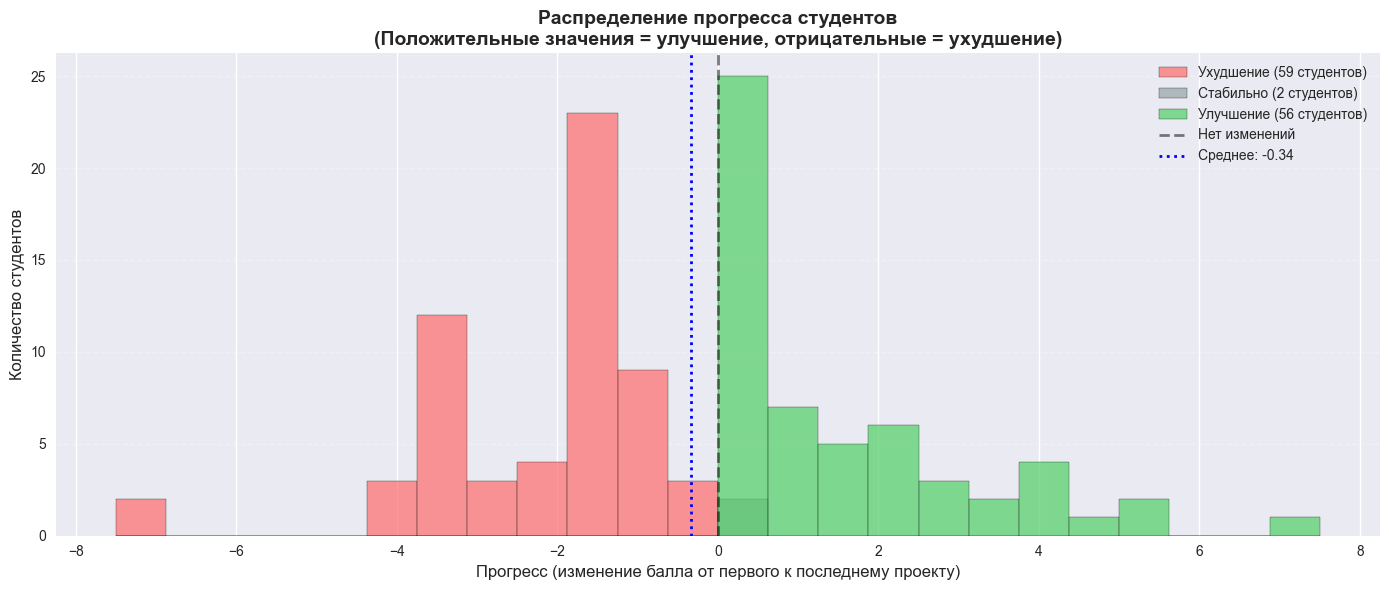

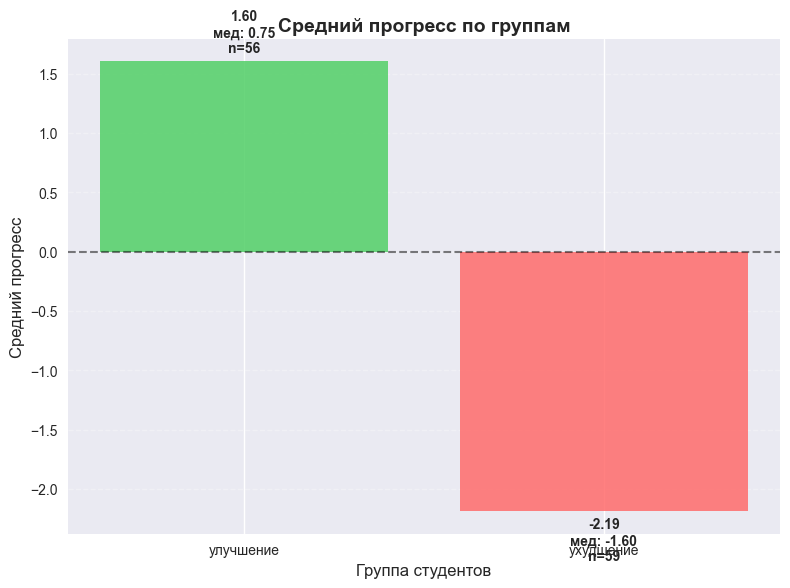

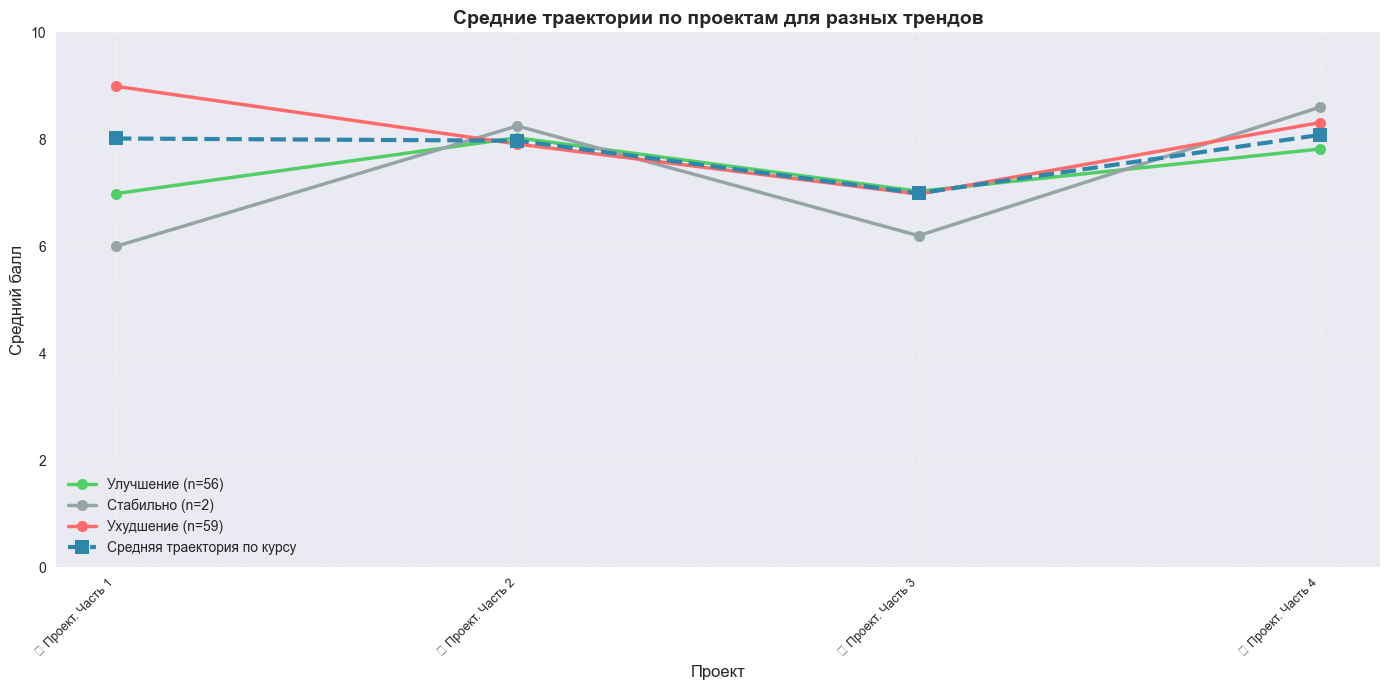


💡 ПОДСКАЗКИ ПО ПРОГРЕССУ СТУДЕНТОВ

🚨 Общий прогресс (50.4% ухудшились)
   ⚠️ КРИТИЧНО: 50.4% студентов показывают ухудшение результатов по курсу, только 47.9% улучшились. Это серьезный сигнал о проблемах с курсом. Рекомендуется: 1) Срочно провести анализ причин ухудшения результатов, 2) Пересмотреть структуру курса и баланс сложности, 3) Усилить поддержку студентов, особенно в середине и конце курса, 4) Провести опрос студентов о проблемах и сложностях, 5) Рассмотреть возможность пересмотра системы оценивания.


In [7]:
progress_df = analytics.get_student_progress()
progress_summary = analytics.get_progress_summary()

if len(progress_df) > 0 and 'Прогресс' in progress_df.columns:
    print("СВОДНАЯ СТАТИСТИКА ПО ПРОГРЕССУ")
    print("=" * 60)
    for key, value in progress_summary.items():
        if isinstance(value, (int, float)):
            if 'прогресс' in key.lower():
                print(f"{key}: {value:.2f}")
            else:
                print(f"{key}: {value}")
        else:
            print(f"{key}: {value}")

    if 'Тренд' in progress_df.columns:
        trend_counts = progress_df['Тренд'].value_counts()
        print("\nРАСПРЕДЕЛЕНИЕ ТРЕНДОВ:")
        total_with_trend = trend_counts.sum()
        for trend, count in trend_counts.items():
            pct = count / total_with_trend * 100 if total_with_trend > 0 else 0
            print(f"  {trend}: {count} студентов ({pct:.1f}%)")
    
    progress_values = progress_df['Прогресс'].dropna()
    
    if len(progress_values) > 0:
        # ГРАФИК 1: Распределение прогресса с категориями
        fig, ax = plt.subplots(figsize=(14, 6))
        
        # Разделяем на категории
        improving = progress_values[progress_values > 0]
        declining = progress_values[progress_values < 0]
        stable = progress_values[progress_values == 0]
        
        # Создаем гистограмму с разными цветами
        bins = np.linspace(progress_values.min(), progress_values.max(), 25)
        
        if len(declining) > 0:
            ax.hist(declining, bins=bins, alpha=0.7, color='#FF6B6B', 
                   label=f'Ухудшение ({len(declining)} студентов)', edgecolor='black')
        if len(stable) > 0:
            ax.hist(stable, bins=bins, alpha=0.7, color='#95A5A6', 
                   label=f'Стабильно ({len(stable)} студентов)', edgecolor='black')
        if len(improving) > 0:
            ax.hist(improving, bins=bins, alpha=0.7, color='#51CF66', 
                   label=f'Улучшение ({len(improving)} студентов)', edgecolor='black')
        
        ax.axvline(0, color='black', linestyle='--', linewidth=2, alpha=0.5, label='Нет изменений')
        ax.axvline(progress_values.mean(), color='blue', linestyle=':', linewidth=2, 
                  label=f'Среднее: {progress_values.mean():.2f}')
        
        ax.set_xlabel('Прогресс (изменение балла от первого к последнему проекту)', fontsize=12)
        ax.set_ylabel('Количество студентов', fontsize=12)
        ax.set_title('Распределение прогресса студентов\n(Положительные значения = улучшение, отрицательные = ухудшение)', 
                     fontsize=14, fontweight='bold')
        ax.legend(fontsize=10, loc='upper right')
        ax.grid(True, alpha=0.3, axis='y', linestyle='--')
        
        plt.tight_layout()
        plt.show()
        
        # ГРАФИК 2: Средний прогресс по группам (без стабильных)
        if 'Тренд' in progress_df.columns:
            progress_with_trend = progress_df[['Прогресс', 'Тренд']].dropna()
            if len(progress_with_trend) > 0:
                trend_order = ['улучшение', 'ухудшение']
                trend_stats = (
                    progress_with_trend[progress_with_trend['Тренд'].isin(trend_order)]
                    .groupby('Тренд')['Прогресс']
                    .agg(['mean', 'median', 'count'])
                    .reindex(trend_order)
                ).dropna(subset=['count'])

                if len(trend_stats) > 0:
                    fig, ax = plt.subplots(figsize=(8, 6))
                    color_map = {'улучшение': '#51CF66', 'ухудшение': '#FF6B6B'}
                    colors = [color_map.get(trend, '#95A5A6') for trend in trend_stats.index]

                    bars = ax.bar(trend_stats.index, trend_stats['mean'], color=colors, alpha=0.85)
                    ax.axhline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

                    for bar, mean, median, count in zip(bars, trend_stats['mean'], trend_stats['median'], trend_stats['count']):
                        y_pos = mean + 0.05 if mean >= 0 else mean - 0.05
                        va = 'bottom' if mean >= 0 else 'top'
                        ax.text(
                            bar.get_x() + bar.get_width() / 2,
                            y_pos,
                            f"{mean:.2f}\nмед: {median:.2f}\nn={int(count)}",
                            ha='center', va=va,
                            fontsize=10, fontweight='bold'
                        )

                    ax.set_ylabel('Средний прогресс', fontsize=12)
                    ax.set_xlabel('Группа студентов', fontsize=12)
                    ax.set_title('Средний прогресс по группам', fontsize=14, fontweight='bold')
                    ax.grid(True, alpha=0.3, axis='y', linestyle='--')

                    plt.tight_layout()
                    plt.show()
        
        # ГРАФИК 3: Средние траектории по проектам
        exclude_cols = ['Прогресс', 'Тренд', 'Студент']
        project_cols = [col for col in progress_df.columns
                        if 'Проект' in col and col not in exclude_cols]

        def get_proj_num(name):
            import re
            match = re.search(r'(\d+)', name)
            return int(match.group(1)) if match else 999

        project_cols = sorted(project_cols, key=get_proj_num)

        if len(project_cols) >= 2 and 'Тренд' in progress_df.columns:
            fig, ax = plt.subplots(figsize=(14, 7))
            trend_order = ['улучшение', 'стабильно', 'ухудшение']
            color_map = {'улучшение': '#51CF66', 'стабильно': '#95A5A6', 'ухудшение': '#FF6B6B'}
            plotted = 0

            for trend_type in trend_order:
                trend_students = progress_df[progress_df['Тренд'] == trend_type]
                if len(trend_students) == 0:
                    continue

                mean_scores = []
                for proj_col in project_cols:
                    scores = trend_students[proj_col].dropna()
                    scores = scores[scores > 0]
                    mean_scores.append(scores.mean() if len(scores) > 0 else np.nan)

                valid_points = [(i, s) for i, s in enumerate(mean_scores) if not pd.isna(s)]
                if len(valid_points) < 2:
                    continue

                x_vals = [v[0] for v in valid_points]
                y_vals = [v[1] for v in valid_points]
                ax.plot(
                    x_vals,
                    y_vals,
                    marker='o',
                    linewidth=2.5,
                    markersize=8,
                    color=color_map.get(trend_type, '#95A5A6'),
                    label=f"{trend_type.capitalize()} (n={len(trend_students)})"
                )
                plotted += 1

            overall_mean = []
            for proj_col in project_cols:
                scores = progress_df[proj_col].dropna()
                scores = scores[scores > 0]
                overall_mean.append(scores.mean() if len(scores) > 0 else np.nan)

            valid_overall = [(i, s) for i, s in enumerate(overall_mean) if not pd.isna(s)]
            overall_plotted = False
            if len(valid_overall) >= 2:
                x_vals = [v[0] for v in valid_overall]
                y_vals = [v[1] for v in valid_overall]
                ax.plot(
                    x_vals,
                    y_vals,
                    marker='s',
                    linewidth=3,
                    markersize=10,
                    color='#2E86AB',
                    linestyle='--',
                    label='Средняя траектория по курсу',
                    zorder=5
                )
                overall_plotted = True

            if plotted == 0 and not overall_plotted:
                plt.close(fig)
            else:
                ax.set_xticks(range(len(project_cols)))
                ax.set_xticklabels(
                    [col[:20] + '...' if len(col) > 20 else col for col in project_cols],
                    rotation=45,
                    ha='right',
                    fontsize=9
                )
                ax.set_ylabel('Средний балл', fontsize=12)
                ax.set_xlabel('Проект', fontsize=12)
                ax.set_title('Средние траектории по проектам для разных трендов', fontsize=14, fontweight='bold')
                ax.set_ylim(0, 10)
                ax.grid(True, alpha=0.3, linestyle='--')
                ax.legend(fontsize=10, loc='best')

                plt.tight_layout()
                plt.show()
else:
    print("Недостаточно данных для анализа прогресса")

# Подсказки по прогрессу студентов
print("\n" + "=" * 80)
print("💡 ПОДСКАЗКИ ПО ПРОГРЕССУ СТУДЕНТОВ")
print("=" * 80)
progress_insights = insights.get_progress_insights()
if progress_insights:
    for i, insight in enumerate(progress_insights, 1):
        icon = "🚨" if insight['type'] == 'warning' else "ℹ️" if insight['type'] == 'info' else "✅"
        print(f"\n{icon} {insight['activity']} ({insight['value']})")
        print(f"   {insight['recommendation']}")
else:
    print("Нет критических замечаний по прогрессу студентов.")


## МЕТРИКА 3: Качество обучения

### Корреляция между типами работ


КОРРЕЛЯЦИОННАЯ МАТРИЦА МЕЖДУ АКТИВНОСТЯМИ РЕПЕРНЫХ ТОЧЕК

Матрица показывает, насколько связаны результаты студентов по основным активностям курса.
Значения от -1 до 1, где:
  • 1.0 = идеальная положительная связь (100% совпадение)
  • 0.0 = отсутствие связи
  • -1.0 = идеальная отрицательная связь (обратная зависимость)

                   🏆 Проект. Часть 1  🏆 Проект. Часть 2  Коллоквиум 1  \
🏆 Проект. Часть 1              1.000              0.637         0.351   
🏆 Проект. Часть 2              0.637              1.000         0.366   
Коллоквиум 1                   0.351              0.366         1.000   
🏆 Проект. Часть 3              0.485              0.644         0.173   
🏆 Проект. Часть 4              0.474              0.593         0.223   

                   🏆 Проект. Часть 3  🏆 Проект. Часть 4  
🏆 Проект. Часть 1              0.485              0.474  
🏆 Проект. Часть 2              0.644              0.593  
Коллоквиум 1                   0.173              0.223  
🏆 Про

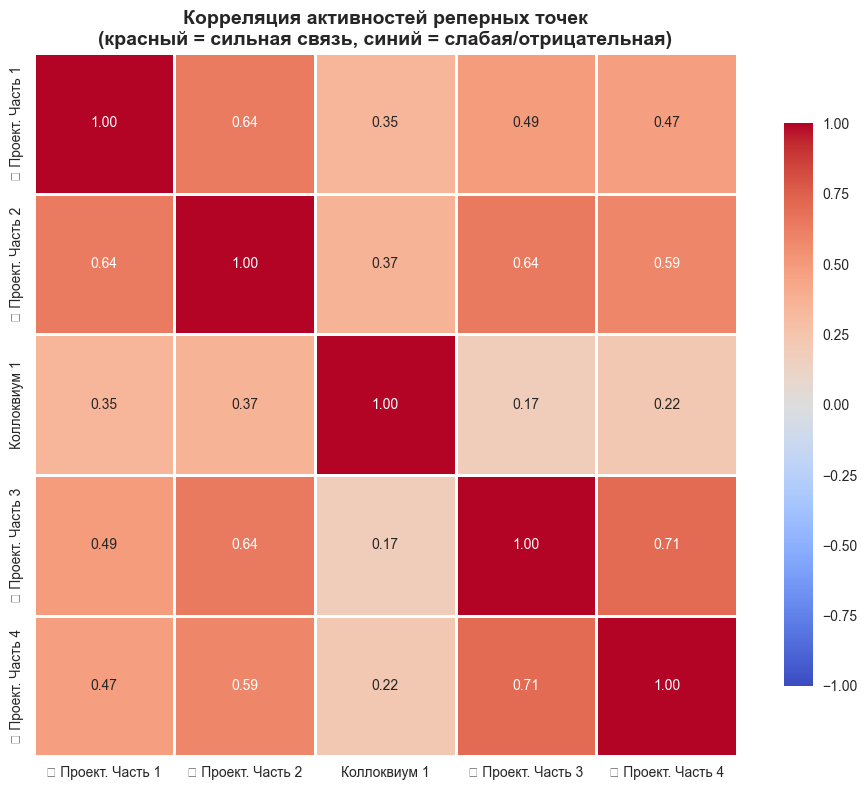


💡 ПОДСКАЗКИ ПО КОРРЕЛЯЦИЯМ

✅ 🏆 Проект. Часть 1 ↔ 🏆 Проект. Часть 2 (0.64)
   ✅ Обнаружена сильная положительная корреляция (0.64) между '🏆 Проект. Часть 1' и '🏆 Проект. Часть 2'. Это означает, что студенты, успешно выполнившие одну работу, обычно успешно выполняют и другую. Рекомендуется: 1) Использовать успешные практики одной активности в другой, 2) Рассмотреть возможность последовательного построения навыков, 3) Применить похожие подходы к другим активностям.

✅ 🏆 Проект. Часть 2 ↔ 🏆 Проект. Часть 3 (0.64)
   ✅ Обнаружена сильная положительная корреляция (0.64) между '🏆 Проект. Часть 2' и '🏆 Проект. Часть 3'. Это означает, что студенты, успешно выполнившие одну работу, обычно успешно выполняют и другую. Рекомендуется: 1) Использовать успешные практики одной активности в другой, 2) Рассмотреть возможность последовательного построения навыков, 3) Применить похожие подходы к другим активностям.

✅ 🏆 Проект. Часть 3 ↔ 🏆 Проект. Часть 4 (0.71)
   ✅ Обнаружена сильная положительная корр

In [8]:
corr_matrix = analytics.get_correlations()

if len(corr_matrix) > 0:
    print("КОРРЕЛЯЦИОННАЯ МАТРИЦА МЕЖДУ АКТИВНОСТЯМИ РЕПЕРНЫХ ТОЧЕК")
    print("=" * 60)
    print("\nМатрица показывает, насколько связаны результаты студентов по основным активностям курса.")
    print("Значения от -1 до 1, где:")
    print("  • 1.0 = идеальная положительная связь (100% совпадение)")
    print("  • 0.0 = отсутствие связи")
    print("  • -1.0 = идеальная отрицательная связь (обратная зависимость)")
    print("\n" + "=" * 60)
    print(corr_matrix.round(3))
    
    print("\nКАК ЧИТАТЬ МАТРИЦУ/ГРАФИК:")
    print("   • Диагональ всегда 1.00 — это сравнение активности с самой собой.")
    print("   • Чем ближе значение к +1, тем сильнее перенос навыков между активностями.")
    print("   • Значения около 0 показывают независимые компетенции.")
    print("   • Отрицательные значения (синие ячейки) — сигнал диссонанса: успех в одной активности сопровождается провалом в другой.")
    
    engagement_types = getattr(analytics, 'engagement_activity_types', [])
    work_types = {
        work_name: analytics.work_data.get(work_name, {}).get('work_type')
        for work_name in corr_matrix.columns
    }
    type_labels = {
        t: analytics.activity_classifier.get(t, {}).get('label', t.capitalize())
        for t in set(work_types.values()) if t
    }

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                vmin=-1, vmax=1, ax=ax)
    ax.set_title('Корреляция активностей реперных точек\n(красный = сильная связь, синий = слабая/отрицательная)',
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    from itertools import combinations
    work_names = corr_matrix.index.tolist()
    strong_correlations = []
    weak_correlations = []
    type_pairs = {}

    for w1, w2 in combinations(work_names, 2):
        corr_value = corr_matrix.loc[w1, w2]
        if pd.isna(corr_value):
            continue
        if abs(corr_value) >= 0.6:
            strong_correlations.append((w1, w2, corr_value))
        elif abs(corr_value) < 0.3:
            weak_correlations.append((w1, w2, corr_value))

        t1 = work_types.get(w1) or 'other'
        t2 = work_types.get(w2) or 'other'
        key = tuple(sorted((t1, t2)))
        type_pairs.setdefault(key, []).append(corr_value)
else:
    print("Недостаточно данных для анализа корреляций (нужно минимум 2 активности реперных точек)")

# Подсказки по корреляциям
print("\n" + "=" * 80)
print("💡 ПОДСКАЗКИ ПО КОРРЕЛЯЦИЯМ")
print("=" * 80)
correlation_insights = insights.get_correlation_insights()
if correlation_insights:
    for i, insight in enumerate(correlation_insights, 1):
        icon = "🚨" if insight['type'] == 'warning' else "ℹ️" if insight['type'] == 'info' else "✅"
        print(f"\n{icon} {insight['activity']} ({insight['value']})")
        print(f"   {insight['recommendation']}")
else:
    print("Нет критических замечаний по корреляциям.")


### Корреляции всех заданий с ключевыми активностями (реперными точками)


СВЯЗЬ ОСНОВНЫХ И БОНУСНЫХ АКТИВНОСТЕЙ С АКТИВНОСТЯМИ РЕПЕРНЫХ ТОЧЕК
Строки — основные и бонусные активности. Столбцы — активности реперных точек.
                                                    🏆 Проект. Часть 1  \
⌨️ Git и GitLab                                                 0.042   
⌨️ Протокол HTTP и основы работы с API                          0.040   
⌨️ FastAPI: организация проекта и работа с HTML...              0.017   
⌨️ Асинхронное программирование в Python                        0.132   
⌨️ MongoDB и FastAPI                                            0.079   
⌨️ Взаимодействие с внешними API через httpx                    0.083   
⌨️ Middleware в FastAPI                                         0.165   
⌨️ Основы кеширования и использование Redis                     0.111   
⌨️ TTL и инвалидация кеша                                       0.074   

                                                    🏆 Проект. Часть 2  \
⌨️ Git и GitLab                                   

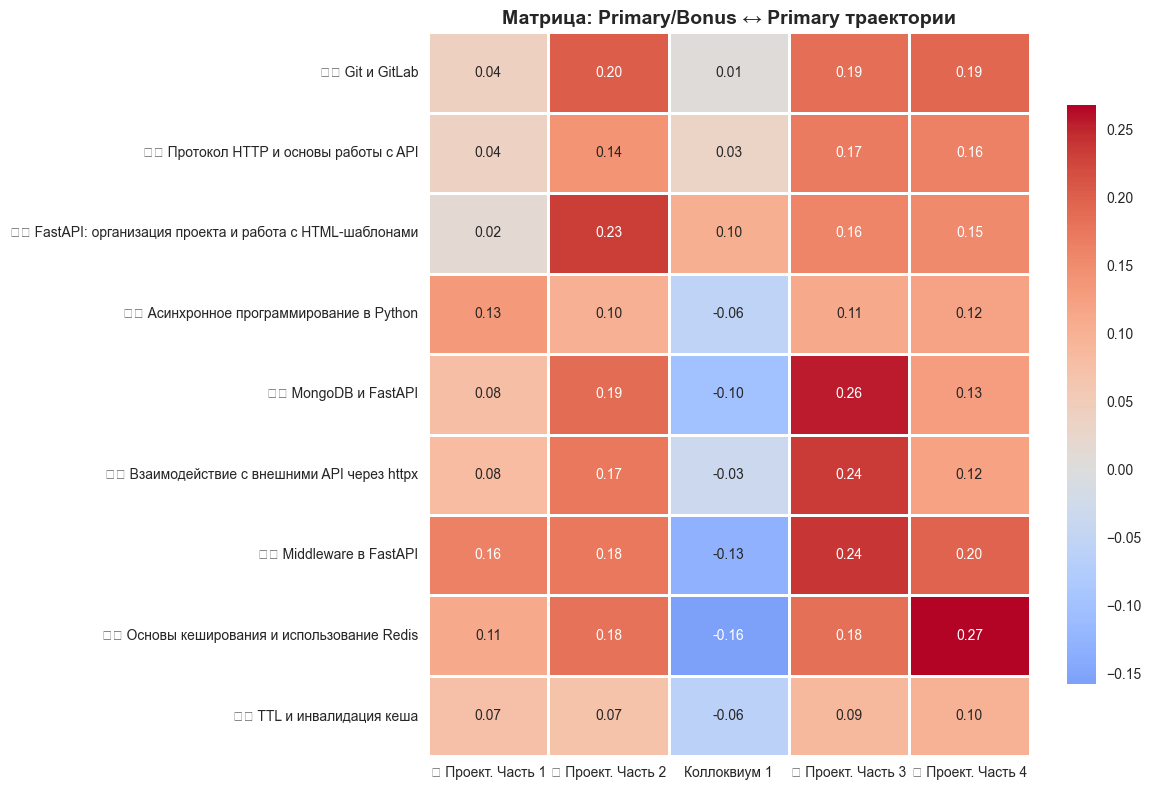

БОНУСНЫЕ АКТИВНОСТИ


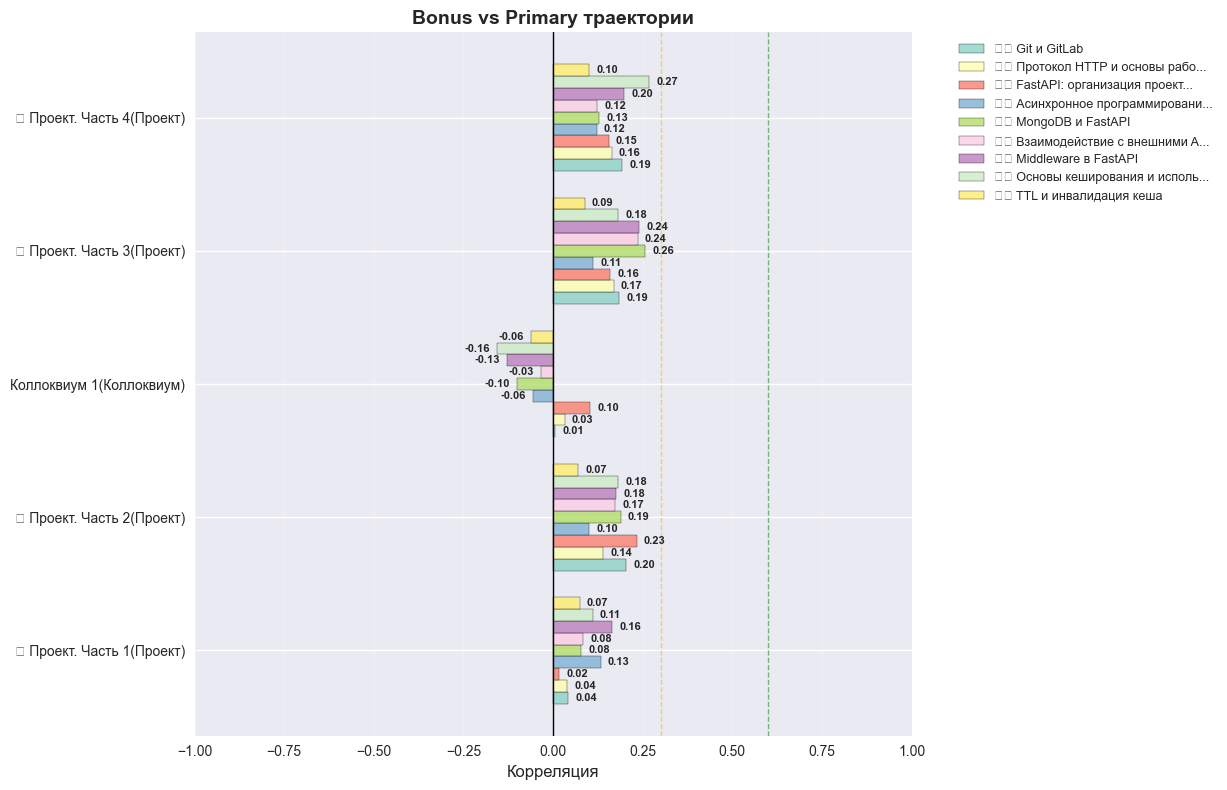

In [9]:
correlations_with_engagement = analytics.get_correlations_with_projects()

if len(correlations_with_engagement) > 0:
    source_types = {
        name: analytics.work_data.get(name, {}).get('work_type')
        for name in correlations_with_engagement.index
    }
    engagement_types = {
        name: analytics.work_data.get(name, {}).get('work_type')
        for name in correlations_with_engagement.columns
    }
    engagement_labels = {
        name: analytics.activity_classifier.get(engagement_types.get(name, ''), {}).get('label', name)
        for name in correlations_with_engagement.columns
    }

    primary_outside = [name for name, t in source_types.items() if t in set(analytics.primary_activity_types or [])]
    bonus_activities = [name for name, t in source_types.items() if t in (analytics.bonus_types or {'bonus'})]

    print("=" * 80)
    print("СВЯЗЬ ОСНОВНЫХ И БОНУСНЫХ АКТИВНОСТЕЙ С АКТИВНОСТЯМИ РЕПЕРНЫХ ТОЧЕК")
    print("=" * 80)
    print("Строки — основные и бонусные активности. Столбцы — активности реперных точек.")

    display_df = correlations_with_engagement.round(3)
    print(display_df)

    print("   КАК ЧИТАТЬ МАТРИЦУ:")
    print("   • Строки: подготовительные primary и bonus-активности.")
    print("   • Столбцы: primary-активности траектории вовлеченности.")
    print("   • ≥0.4 — заметная связь, 0–0.4 — слабый эффект, <0 — возможный конфликт.")

    fig, ax = plt.subplots(figsize=(max(12, len(correlations_with_engagement.columns) * 1.6), 8))
    sns.heatmap(
        correlations_with_engagement,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        linewidths=1,
        cbar_kws={'shrink': 0.8},
        ax=ax
    )
    ax.set_title('Матрица: Primary/Bonus ↔ Primary траектории', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    if bonus_activities:
        print("    " + "=" * 80)
        print("БОНУСНЫЕ АКТИВНОСТИ")
        print("=" * 80)
        bonus_corrs = correlations_with_engagement.loc[bonus_activities]
        fig, ax = plt.subplots(figsize=(max(12, len(bonus_corrs.columns) * 2.5), max(8, len(bonus_activities) * 0.6)))
        x_pos = np.arange(len(bonus_corrs.columns))
        width = 0.8 / len(bonus_activities)
        colors_bonus = plt.cm.Set3(np.linspace(0, 1, len(bonus_activities)))
        for i, (bonus_work, row) in enumerate(bonus_corrs.iterrows()):
            short_name = bonus_work[:30] + '...' if len(bonus_work) > 30 else bonus_work
            offset = (i - len(bonus_activities) / 2 + 0.5) * width
            ax.barh(x_pos + offset, row.values, width, label=short_name, color=colors_bonus[i], alpha=0.8, edgecolor='black')
            for j, val in enumerate(row.values):
                if not pd.isna(val):
                    ax.text(val + 0.02 if val >= 0 else val - 0.02, j + offset, f"{val:.2f}", va='center', fontsize=8, fontweight='bold', ha='left' if val >= 0 else 'right')
        column_labels = [f"{col}({engagement_labels.get(col, col)})" for col in bonus_corrs.columns]
        ax.set_yticks(x_pos)
        ax.set_yticklabels(column_labels, fontsize=10)
        ax.set_xlabel('Корреляция', fontsize=12)
        ax.set_title('Bonus vs Primary траектории', fontsize=14, fontweight='bold')
        ax.axvline(0, color='black', linestyle='-', linewidth=1)
        ax.axvline(0.3, color='orange', linestyle='--', linewidth=1, alpha=0.5)
        ax.axvline(0.6, color='green', linestyle='--', linewidth=1, alpha=0.5)
        ax.set_xlim(-1, 1)
        ax.grid(True, alpha=0.3, axis='x', linestyle='--')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
        plt.tight_layout()
        plt.show()

    if primary_outside:
        print("=" * 80)
        print("ОСНОВНЫЕ АКТИВНОСТИ")
        print("=" * 80)
        primary_corrs = correlations_with_engagement.loc[primary_outside]
        fig, ax = plt.subplots(figsize=(max(12, len(primary_corrs.columns) * 2.5), max(8, len(primary_outside) * 0.6)))
        x_pos = np.arange(len(primary_corrs.columns))
        width = 0.8 / len(primary_outside)
        colors_primary = plt.cm.viridis(np.linspace(0, 1, len(primary_outside)))
        for i, (primary_work, row) in enumerate(primary_corrs.iterrows()):
            short_name = primary_work[:30] + '...' if len(primary_work) > 30 else primary_work
            offset = (i - len(primary_outside) / 2 + 0.5) * width
            ax.barh(x_pos + offset, row.values, width, label=short_name, color=colors_primary[i], alpha=0.8, edgecolor='black')
            for j, val in enumerate(row.values):
                if not pd.isna(val):
                    ax.text(val + 0.02 if val >= 0 else val - 0.02, j + offset, f"{val:.2f}", va='center', fontsize=8, fontweight='bold', ha='left' if val >= 0 else 'right')
        column_labels = [f"{col}({engagement_labels.get(col, col)})" for col in primary_corrs.columns]
        ax.set_yticks(x_pos)
        ax.set_yticklabels(column_labels, fontsize=10)
        ax.set_xlabel('Корреляция', fontsize=12)
        ax.set_title('Primary (вне траектории) vs Primary траектории', fontsize=14, fontweight='bold')
        ax.axvline(0, color='black', linestyle='-', linewidth=1)
        ax.axvline(0.3, color='orange', linestyle='--', linewidth=1, alpha=0.5)
        ax.axvline(0.6, color='green', linestyle='--', linewidth=1, alpha=0.5)
        ax.set_xlim(-1, 1)
        ax.grid(True, alpha=0.3, axis='x', linestyle='--')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
        plt.tight_layout()
        plt.show()
else:
    print("Недостаточно данных для анализа корреляций")

### Консистентность результатов


КОНСИСТЕНТНОСТЬ РЕЗУЛЬТАТОВ СТУДЕНТОВ
РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:
--------------------------------------------------------------------------------
  • умеренно стабильный: 54 студентов (42.2%)
  • стабильно успешный: 37 студентов (28.9%)
  • нестабильный: 25 студентов (19.5%)
  • нет активностей: 9 студентов (7.0%)
  • единичная активность: 2 студентов (1.6%)
  • стабильно неуспешный: 1 студентов (0.8%)

СТАТИСТИКА ПО КОЭФФИЦИЕНТУ ВАРИАЦИИ:
--------------------------------------------------------------------------------
  • Средний CV: 0.195
  • Медиана CV: 0.160
  • Минимальный CV: 0.017 (самый стабильный студент)
  • Максимальный CV: 0.587 (самый нестабильный студент)

  Распределение по уровням стабильности:
    ✅ Очень стабильные (CV < 0.1): 37 студентов
    ⚠️ Умеренно стабильные (CV 0.1-0.3): 55 студентов
    ❌ Нестабильные (CV > 0.3): 25 студентов


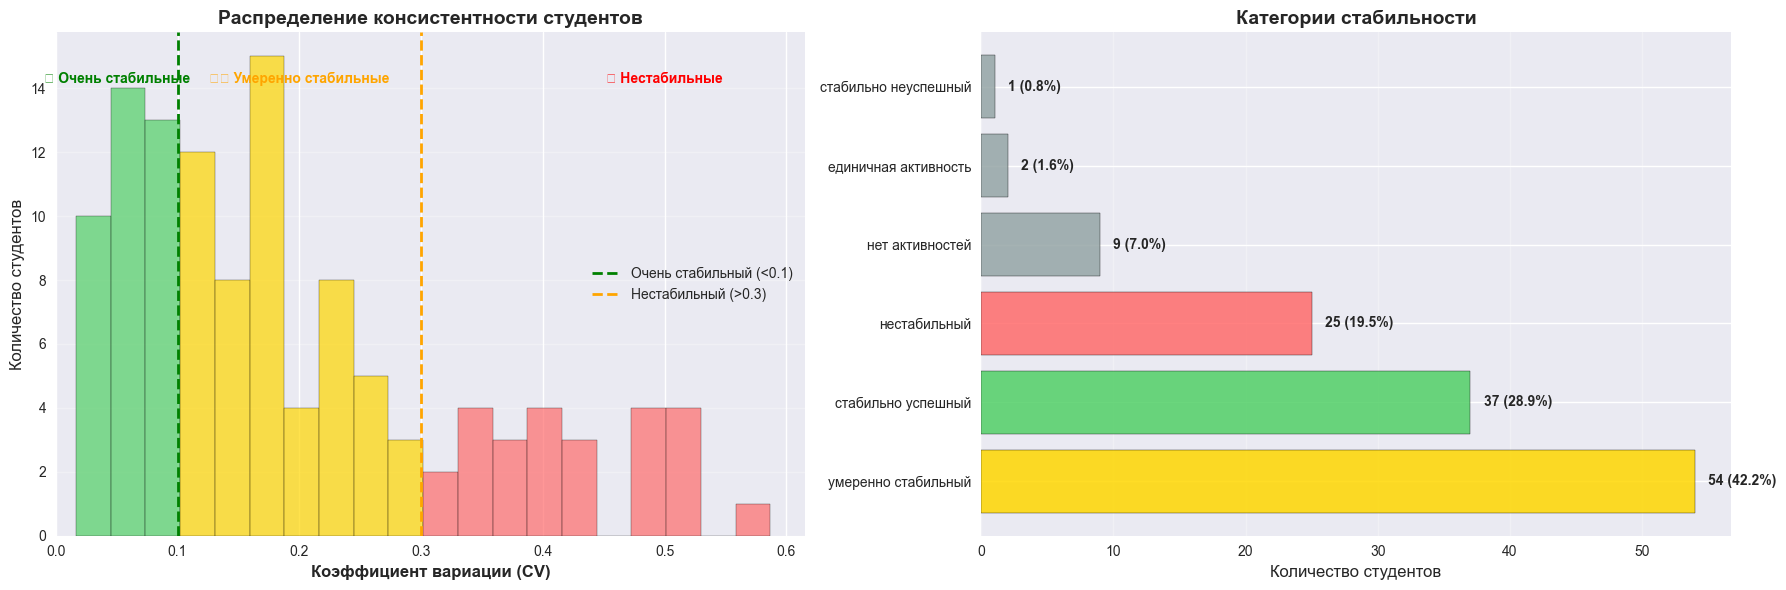

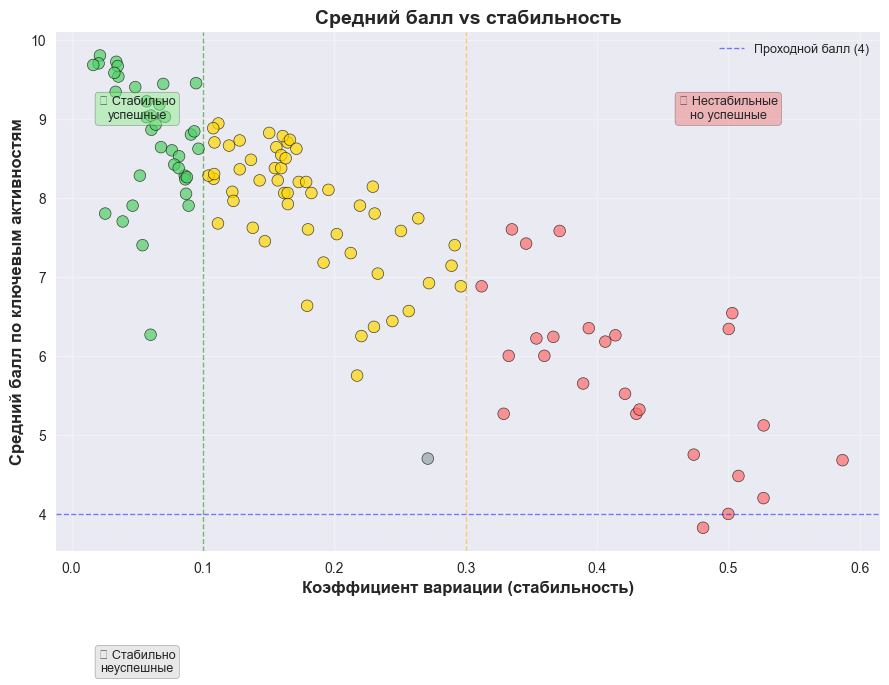


Средние показатели по категориям:
                      Средний балл (ср.)  CV (ср.)
Категория                                         
единичная активность               7.500       NaN
нестабильный                       5.748     0.424
нет активностей                      NaN       NaN
стабильно неуспешный               4.700     0.271
стабильно успешный                 8.742     0.061
умеренно стабильный                7.882     0.179

ДЕТАЛЬНАЯ ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ

УМЕРЕННО СТАБИЛЬНЫЙ (54 студентов, 42.2%):
   • Средний балл по группе: 7.88
   • Средний коэффициент вариации: 0.179

   СТУДЕНТЫ В ЭТОЙ ГРУППЕ (54 человек):
   ----------------------------------------------------------------------------
    1. Смирнов Серафим Юрьевич     2. Иванов Егор Олегович        3. Насруллаев Рашид Камильевич  
    4. Шишин Даниил Олегович       5. Габдуллин Артём Ильдарович   6. Шеманов Алексей Юрьевич    
    7. Данильченко Александр Владиславович   8. Гисматуллин Ратмир Артурович   9. М

In [10]:
consistency_df = analytics.get_consistency()

if len(consistency_df) > 0:
    print("=" * 80)
    print("КОНСИСТЕНТНОСТЬ РЕЗУЛЬТАТОВ СТУДЕНТОВ")
    print("=" * 80)
    
    # Распределение по категориям
    category_colors = {
        'стабильно успешный': '#51CF66',
        'умеренно стабильный': '#FFD700',
        'нестабильный': '#FF6B6B',
        'стабильно неуспешный': '#95A5A6',
        'единичная сдача': '#BDC3C7',
        'нет сдач по проектам': '#6C757D'
    }
    if 'Категория' in consistency_df.columns:
        category_counts = consistency_df['Категория'].value_counts()
        print("РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:")
        print("-" * 80)
        for category, count in category_counts.items():
            percentage = count / len(consistency_df) * 100
            print(f"  • {category}: {count} студентов ({percentage:.1f}%)")
    
    # Статистика по коэффициенту вариации
    cv_values = consistency_df['Коэффициент вариации'].dropna()
    if len(cv_values) > 0:
        print(f"\nСТАТИСТИКА ПО КОЭФФИЦИЕНТУ ВАРИАЦИИ:")
        print("-" * 80)
        print(f"  • Средний CV: {cv_values.mean():.3f}")
        print(f"  • Медиана CV: {cv_values.median():.3f}")
        print(f"  • Минимальный CV: {cv_values.min():.3f} (самый стабильный студент)")
        print(f"  • Максимальный CV: {cv_values.max():.3f} (самый нестабильный студент)")
        
        # Подсчет по зонам
        very_stable = (cv_values < 0.1).sum()
        moderate = ((cv_values >= 0.1) & (cv_values <= 0.3)).sum()
        unstable = (cv_values > 0.3).sum()
        
        print(f"\n  Распределение по уровням стабильности:")
        print(f"    ✅ Очень стабильные (CV < 0.1): {very_stable} студентов")
        print(f"    ⚠️ Умеренно стабильные (CV 0.1-0.3): {moderate} студентов")
        print(f"    ❌ Нестабильные (CV > 0.3): {unstable} студентов")
    
    # ВИЗУАЛИЗАЦИЯ: распределение консистентности и категорий
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Гистограмма коэффициента вариации
    ax_hist = axes[0]
    if len(cv_values) > 0:
        n, bins, patches = ax_hist.hist(cv_values, bins=20, edgecolor='black', alpha=0.7)
        ax_hist.axvline(0.1, color='green', linestyle='--', linewidth=2, label='Очень стабильный (<0.1)')
        ax_hist.axvline(0.3, color='orange', linestyle='--', linewidth=2, label='Нестабильный (>0.3)')
        for patch, bin_left in zip(patches, bins[:-1]):
            if bin_left < 0.1:
                patch.set_facecolor('#51CF66')
            elif bin_left < 0.3:
                patch.set_facecolor('#FFD700')
            else:
                patch.set_facecolor('#FF6B6B')
        ax_hist.set_xlabel('Коэффициент вариации (CV)', fontsize=12, fontweight='bold')
        ax_hist.set_ylabel('Количество студентов', fontsize=12)
        ax_hist.set_title('Распределение консистентности студентов', fontsize=14, fontweight='bold')
        ax_hist.grid(True, alpha=0.3, axis='y')
        ax_hist.set_xlim(left=0)
        ymax = ax_hist.get_ylim()[1]
        ax_hist.text(0.05, ymax * 0.9, '✅ Очень стабильные', fontsize=10, color='green', fontweight='bold', ha='center')
        ax_hist.text(0.2, ymax * 0.9, '⚠️ Умеренно стабильные', fontsize=10, color='orange', fontweight='bold', ha='center')
        ax_hist.text(0.5, ymax * 0.9, '❌ Нестабильные', fontsize=10, color='red', fontweight='bold', ha='center')
        ax_hist.legend(fontsize=10)
    else:
        ax_hist.text(0.5, 0.5, 'Недостаточно данных', ha='center', va='center', fontsize=12)
        ax_hist.set_axis_off()
    
    # Распределение по категориям
    ax_cat = axes[1]
    if 'Категория' in consistency_df.columns and 'category_counts' in locals():
        colors_list = [category_colors.get(cat, '#95A5A6') for cat in category_counts.index]
        bars = ax_cat.barh(category_counts.index, category_counts.values, color=colors_list, alpha=0.85, edgecolor='black')
        for i, (bar, val) in enumerate(zip(bars, category_counts.values)):
            percentage = val / len(consistency_df) * 100
            ax_cat.text(val + 1, i, f'{val} ({percentage:.1f}%)', va='center', fontsize=10, fontweight='bold')
        ax_cat.set_xlabel('Количество студентов', fontsize=12)
        ax_cat.set_title('Категории стабильности', fontsize=14, fontweight='bold')
        ax_cat.grid(True, alpha=0.3, axis='x')
    else:
        ax_cat.text(0.5, 0.5, 'Категории не определены', ha='center', va='center', fontsize=12)
        ax_cat.set_axis_off()
    
    plt.tight_layout()
    plt.show()
    
    # Визуализация: связь среднего балла и стабильности
    if 'Средний балл' in consistency_df.columns and len(cv_values) > 0:
        mean_scores = consistency_df['Средний балл'].dropna()
        cv_for_mean = consistency_df.loc[mean_scores.index, 'Коэффициент вариации']
        
        fig, ax = plt.subplots(figsize=(9, 7))
        scatter_colors = []
        for idx in mean_scores.index:
            if 'Категория' in consistency_df.columns:
                cat = consistency_df.loc[idx, 'Категория']
                scatter_colors.append(category_colors.get(cat, '#95A5A6'))
            else:
                scatter_colors.append('#95A5A6')
        
        ax.scatter(cv_for_mean, mean_scores, c=scatter_colors, alpha=0.7, s=70, edgecolors='black', linewidth=0.5)
        ax.axvline(0.1, color='green', linestyle='--', linewidth=1, alpha=0.5)
        ax.axvline(0.3, color='orange', linestyle='--', linewidth=1, alpha=0.5)
        ax.axhline(4, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='Проходной балл (4)')
        ax.set_xlabel('Коэффициент вариации (стабильность)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Средний балл по ключевым активностям', fontsize=12, fontweight='bold')
        ax.set_title('Средний балл vs стабильность', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=9)
        
        ax.text(0.05, 9, '✅ Стабильно\nуспешные', fontsize=9, ha='center',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
        ax.text(0.5, 9, '❌ Нестабильные\nно успешные', fontsize=9, ha='center',
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
        ax.text(0.05, 2, '📊 Стабильно\nнеуспешные', fontsize=9, ha='center',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
        
        plt.tight_layout()
        plt.show()
        
        if 'Категория' in consistency_df.columns:
            summary_cols = [col for col in ['Средний балл', 'Коэффициент вариации'] if col in consistency_df.columns]
            if summary_cols:
                category_summary = (
                    consistency_df.groupby('Категория')[summary_cols]
                    .mean()
                    .rename(columns={'Средний балл': 'Средний балл (ср.)',
                                     'Коэффициент вариации': 'CV (ср.)'})
                    .round(3)
                )
                print("\nСредние показатели по категориям:")
                print(category_summary.to_string())
    
    # ДЕТАЛЬНАЯ ИНТЕРПРЕТАЦИЯ
    print("\n" + "=" * 80)
    print("ДЕТАЛЬНАЯ ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ")
    print("=" * 80)
    
    if 'Категория' in consistency_df.columns:
        # Анализ каждой категории
        for category in category_counts.index:
            cat_data = consistency_df[consistency_df['Категория'] == category]
            count = len(cat_data)
            percentage = count / len(consistency_df) * 100
            
            print(f"\n{category.upper()} ({count} студентов, {percentage:.1f}%):")
            
            if 'Средний балл' in cat_data.columns:
                avg_mean = cat_data['Средний балл'].mean()
                print(f"   • Средний балл по группе: {avg_mean:.2f}")
            
            if 'Коэффициент вариации' in cat_data.columns:
                avg_cv = cat_data['Коэффициент вариации'].mean()
                print(f"   • Средний коэффициент вариации: {avg_cv:.3f}")
            
            # Выводим список студентов в этой категории
            if 'ФИО' in cat_data.columns:
                # Сортируем по среднему баллу (если есть) или по ФИО
                if 'Средний балл' in cat_data.columns:
                    sorted_cat = cat_data.sort_values('Средний балл', ascending=False, na_position='last')
                else:
                    sorted_cat = cat_data.sort_values('ФИО')
                
                print(f"\n   СТУДЕНТЫ В ЭТОЙ ГРУППЕ ({len(sorted_cat)} человек):")
                print("   " + "-" * 76)
                
                # Выводим в несколько колонок для компактности
                students_list = sorted_cat['ФИО'].tolist()
                if len(students_list) <= 20:
                    # Если студентов немного, выводим с дополнительной информацией
                    for idx, (_, row) in enumerate(sorted_cat.iterrows(), 1):
                        name = row['ФИО']
                        if 'Средний балл' in row and not pd.isna(row['Средний балл']):
                            mean = row['Средний балл']
                            cv = row['Коэффициент вариации'] if 'Коэффициент вариации' in row and not pd.isna(row['Коэффициент вариации']) else None
                            if cv is not None:
                                print(f"   {idx:2d}. {name:<40} (средний: {mean:.2f}, CV: {cv:.3f})")
                            else:
                                print(f"   {idx:2d}. {name:<40} (средний: {mean:.2f})")
                        else:
                            print(f"   {idx:2d}. {name}")
                else:
                    # Если студентов много, выводим только имена в несколько колонок
                    cols = 3
                    for i in range(0, len(students_list), cols):
                        row_students = students_list[i:i+cols]
                        row_str = "   "
                        for j, name in enumerate(row_students):
                            row_str += f"{i+j+1:2d}. {name:<25}  "
                        print(row_str)
            
            # Рекомендации
            if category == 'стабильно успешный':
                print(f"\n   Эти студенты работают стабильно на высоком уровне")
                print(f"   → Можно давать более сложные задания")
                print(f"   → Потенциальные лидеры группы")
            elif category == 'нестабильный':
                print(f"\n   Результаты этих студентов сильно различаются")
                print(f"   → Возможные причины: проблемы с мотивацией, пониманием материала")
                print(f"   → Рекомендация: индивидуальная поддержка, выяснить причины нестабильности")
            elif category == 'стабильно неуспешный':
                print(f"\n   Эти студенты стабильно получают низкие оценки")
                print(f"   → Нужна индивидуальная помощь и дополнительная поддержка")
                print(f"   → Возможно, требуется пересмотр подхода к обучению")
            elif category == 'умеренно стабильный':
                print(f"\n   У этих студентов есть небольшие колебания в результатах")
                print(f"   → Это нормально, но стоит следить за динамикой")
            elif category == 'единичная сдача':
                print(f"\n   Всего одна сдача — прогресс ещё нельзя оценить")
                print(f"   → Отслеживайте дальнейшую активность, напомните про ключевые активности")
            elif category == 'нет сдач по проектам':
                print(f"\n   Студенты не сдавали ключевые активности")
                print(f"   → Важно связаться, выяснить причины отсутствия активности")
                print(f"   → Рекомендация: отправить напоминания или предложить стартовую поддержку")
else:
    print("Недостаточно данных для анализа консистентности")

# Подсказки по консистентности
print("\n" + "=" * 80)
print("💡 ПОДСКАЗКИ ПО КОНСИСТЕНТНОСТИ")
print("=" * 80)
consistency_insights = insights.get_consistency_insights()
if consistency_insights:
    for i, insight in enumerate(consistency_insights, 1):
        icon = "🚨" if insight['type'] == 'warning' else "ℹ️" if insight['type'] == 'info' else "✅"
        print(f"\n{icon} {insight['activity']} ({insight['value']})")
        print(f"   {insight['recommendation']}")
else:
    print("Нет критических замечаний по консистентности.")


## МЕТРИКА 4: Сравнительные метрики

### Сравнение сложности основных активностей


СРАВНЕНИЕ СЛОЖНОСТИ ОСНОВНЫХ АКТИВНОСТЕЙ
Показатель формируется из трёх компонентов: выполнения (обратная шкала), среднего балла (обратная шкала) и разброса.
Чем выше индекс, тем более сложной выглядит активность.
       Активность Тип (название)  Процент выполнения  Средний балл  Стандартное отклонение  Индекс сложности
🏆 Проект. Часть 3         Проект              75.781         6.993                   2.063             0.928
🏆 Проект. Часть 4         Проект              75.781         8.082                   1.970             0.470
     Коллоквиум 1     Коллоквиум              85.156         7.560                   1.854             0.249
🏆 Проект. Часть 1         Проект              86.719         8.016                   2.182             0.224
🏆 Проект. Часть 2         Проект              83.594         7.975                   1.918             0.193


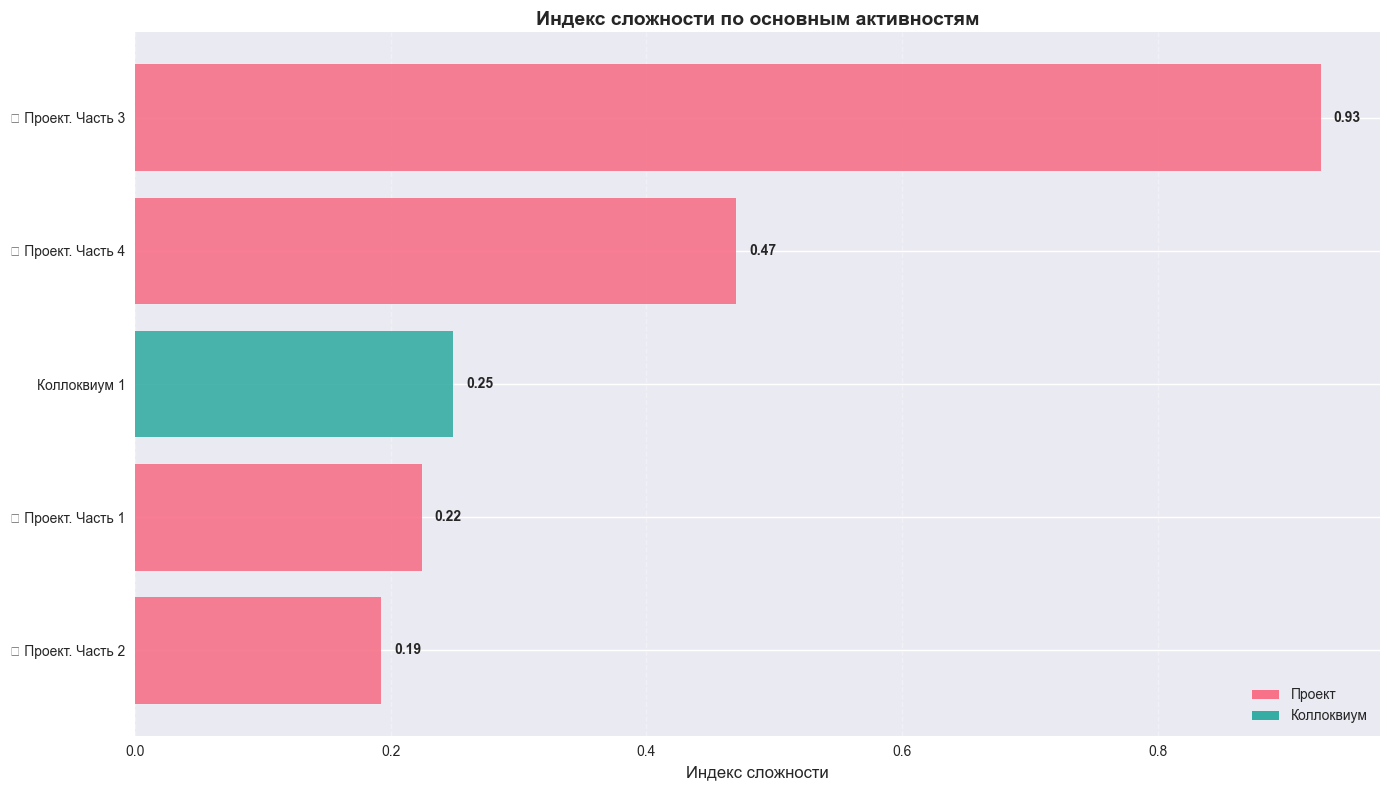

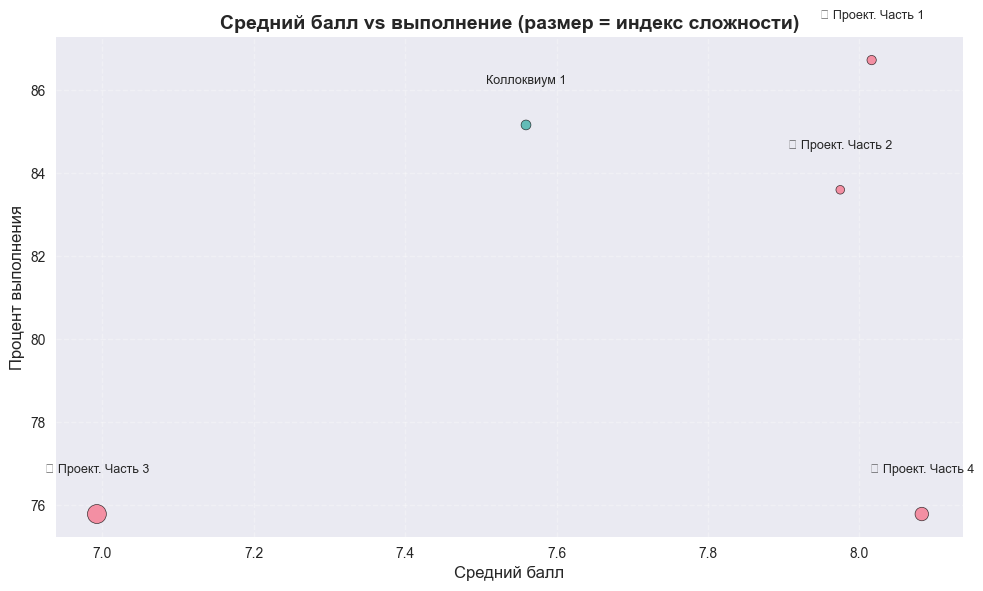


💡 ПОДСКАЗКИ ПО СЛОЖНОСТИ АКТИВНОСТЕЙ

🚨 🏆 Проект. Часть 3 (Индекс: 0.93)
   ⚠️ Активность '🏆 Проект. Часть 3' имеет самый высокий индекс сложности (0.93), значительно превышающий другие активности (разница с самой простой: 0.73). Это может создавать проблемы для студентов. Рекомендуется: 1) Проанализировать, почему эта активность так сложна (низкая завершенность: 75.8%, низкий средний балл: 6.99), 2) Рассмотреть возможность упрощения или разбиения на этапы, 3) Усилить подготовку студентов перед этой активностью, 4) Добавить дополнительные материалы и примеры.

ℹ️ 🏆 Проект. Часть 2 (Индекс: 0.19)
   ℹ️ Активность '🏆 Проект. Часть 2' имеет очень низкий индекс сложности (0.19). Это может означать, что задание слишком простое и не развивает навыки студентов. Рекомендуется рассмотреть возможность усложнения или добавления дополнительных требований.


In [11]:
from matplotlib.patches import Patch

difficulty_df = analytics.get_difficulty_comparison()

if len(difficulty_df) > 0:
    available_types = difficulty_df['Тип'].unique().tolist()
    ordered_types = [t for t in getattr(analytics, 'type_order', []) if t in available_types]
    for t in available_types:
        if t not in ordered_types:
            ordered_types.append(t)

    palette = sns.color_palette("husl", len(ordered_types))
    type_colors = {t: palette[idx] for idx, t in enumerate(ordered_types)}
    type_labels = {
        t: analytics.activity_classifier.get(t, {}).get('label', t.capitalize())
        for t in ordered_types
    }

    print("=" * 80)
    print("СРАВНЕНИЕ СЛОЖНОСТИ ОСНОВНЫХ АКТИВНОСТЕЙ")
    print("=" * 80)
    print("Показатель формируется из трёх компонентов: выполнения (обратная шкала), среднего балла (обратная шкала) и разброса.")
    print("Чем выше индекс, тем более сложной выглядит активность.")

    display_columns = [
        'Активность',
        'Тип (название)',
        'Процент выполнения',
        'Средний балл',
        'Стандартное отклонение',
        'Индекс сложности'
    ]
    print(difficulty_df[display_columns].round(3).to_string(index=False))

    fig, ax = plt.subplots(figsize=(14, max(8, len(difficulty_df) * 0.5)))
    colors = [type_colors.get(row['Тип'], '#6C757D') for _, row in difficulty_df.iterrows()]
    bars = ax.barh(difficulty_df['Активность'], difficulty_df['Индекс сложности'], color=colors, alpha=0.9)
    ax.set_xlabel('Индекс сложности', fontsize=12)
    ax.set_title('Индекс сложности по основным активностям', fontsize=14, fontweight='bold')
    ax.invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
                f"{width:.2f}", va='center', fontsize=10, fontweight='bold')

    legend_elements = [
        Patch(facecolor=type_colors[t], label=type_labels.get(t, t.capitalize()))
        for t in ordered_types if t in difficulty_df['Тип'].values
    ]
    if legend_elements:
        ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

    ax.grid(True, axis='x', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 6))
    scatter_colors = [type_colors.get(row['Тип'], '#6C757D') for _, row in difficulty_df.iterrows()]
    scatter = ax.scatter(
        difficulty_df['Средний балл'],
        difficulty_df['Процент выполнения'],
        c=scatter_colors,
        s=200 * difficulty_df['Индекс сложности'].fillna(0.5),
        alpha=0.75,
        edgecolors='black',
        linewidth=0.5
    )
    ax.set_xlabel('Средний балл', fontsize=12)
    ax.set_ylabel('Процент выполнения', fontsize=12)
    ax.set_title('Средний балл vs выполнение (размер = индекс сложности)', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')

    for _, row in difficulty_df.iterrows():
        ax.text(row['Средний балл'], row['Процент выполнения'] + 1,
                row['Активность'][:25] + ('…' if len(row['Активность']) > 25 else ''),
                fontsize=9, ha='center')

    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно данных для анализа сложности основных активностей")

# Подсказки по сложности
print("\n" + "=" * 80)
print("💡 ПОДСКАЗКИ ПО СЛОЖНОСТИ АКТИВНОСТЕЙ")
print("=" * 80)
difficulty_insights = insights.get_difficulty_insights()
if difficulty_insights:
    for i, insight in enumerate(difficulty_insights, 1):
        icon = "🚨" if insight['type'] == 'warning' else "ℹ️" if insight['type'] == 'info' else "✅"
        print(f"\n{icon} {insight['activity']} ({insight['value']})")
        print(f"   {insight['recommendation']}")
else:
    print("Нет критических замечаний по сложности активностей.")

### Сводка всех подсказок и рекомендаций


In [13]:
# Получаем все подсказки
all_insights = insights.get_all_insights()

print("=" * 80)
print("📋 СВОДКА ВСЕХ ПОДСКАЗОК И РЕКОМЕНДАЦИЙ")
print("=" * 80)
print(f"\nВсего подсказок: {len(all_insights)}")
print(f"  🚨 Критичных: {sum(1 for i in all_insights if i['type'] == 'warning')}")
print(f"  ℹ️ Информационных: {sum(1 for i in all_insights if i['type'] == 'info')}")
print(f"  ✅ Положительных: {sum(1 for i in all_insights if i['type'] == 'success')}")

print("\n" + "=" * 80)
print(insights.format_insights_for_display(all_insights))


📋 СВОДКА ВСЕХ ПОДСКАЗОК И РЕКОМЕНДАЦИЙ

Всего подсказок: 16
  🚨 Критичных: 4
  ℹ️ Информационных: 4
  ✅ Положительных: 8

ПОДСКАЗКИ И РЕКОМЕНДАЦИИ ПО МЕТРИКАМ КУРСА

🚨 КРИТИЧНЫЕ ПРОБЛЕМЫ (требуют внимания):
--------------------------------------------------------------------------------

1. Успеваемость - ⌨️ Протокол HTTP и основы работы с API
   Значение: Средний балл: 4.60
   Низкий средний балл: 4.60
   ⚠️ Активность '⌨️ Протокол HTTP и основы работы с API' показывает низкий средний балл (4.60). Это может указывать на то, что задание слишком сложное или критерии оценки слишком строгие. Рекомендуется: 1) Пересмотреть сложность задания и требования, 2) Проверить критерии оценки на соответствие уровню студентов, 3) Рассмотреть возможность дополнительных консультаций или материалов, 4) Проанализировать типичные ошибки студентов и добавить разборы.

2. Успеваемость - ⌨️ MongoDB и FastAPI
   Значение: Средний балл: 4.64
   Низкий средний балл: 4.64
   ⚠️ Активность '⌨️ MongoDB и FastAPI' 

## Экспорт всех метрик


In [25]:
all_metrics = analytics.get_all_metrics()

export_to_excel = False  # Установи True, если хотите экспортировать

if export_to_excel:
    output_file = 'course_analytics_report.xlsx'
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        all_metrics['completion_rates'].to_excel(writer, sheet_name='Завершенность', index=False)
        all_metrics['engagement_trajectory'].to_excel(writer, sheet_name='Траектория', index=False)
        all_metrics['performance_distribution'].to_excel(writer, sheet_name='Успеваемость', index=False)
        if len(all_metrics['student_progress']) > 0:
            all_metrics['student_progress'].to_excel(writer, sheet_name='Прогресс', index=False)
        if len(all_metrics['correlations']) > 0:
            all_metrics['correlations'].to_excel(writer, sheet_name='Корреляции')
        if len(all_metrics['consistency']) > 0:
            all_metrics['consistency'].to_excel(writer, sheet_name='Консистентность', index=False)
        if len(all_metrics['difficulty_comparison']) > 0:
            all_metrics['difficulty_comparison'].to_excel(writer, sheet_name='Сложность', index=False)
        if len(all_metrics['variability_analysis']) > 0:
            all_metrics['variability_analysis'].to_excel(writer, sheet_name='Вариативность', index=False)
    
    print(f"Все метрики экспортированы в {output_file}")
else:
    print("Для экспорта результатов установи export_to_excel = True")

Для экспорта результатов установи export_to_excel = True
